C:\Users\chris\AppData\Local\Temp\ipykernel_10292\2407200027.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


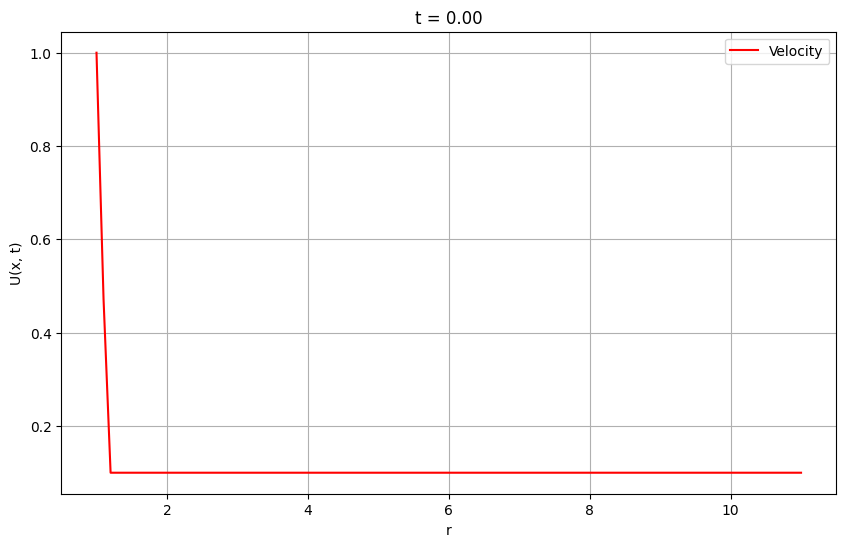

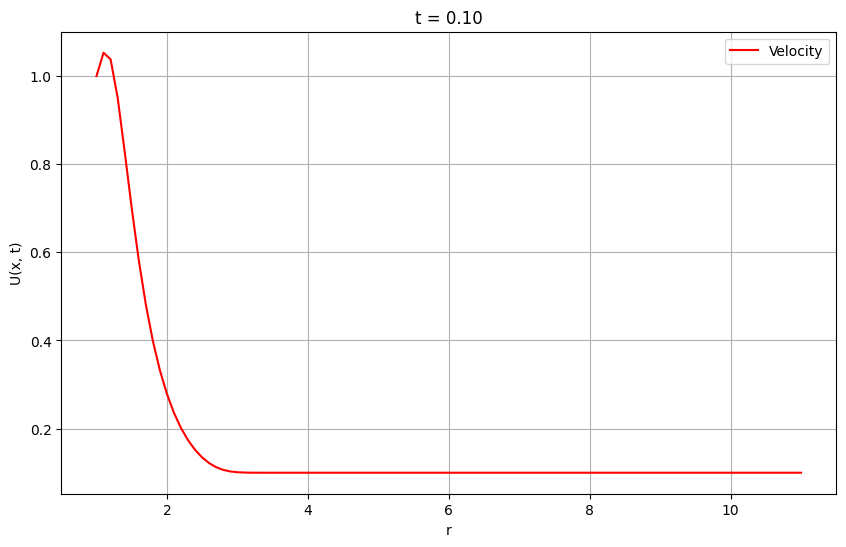

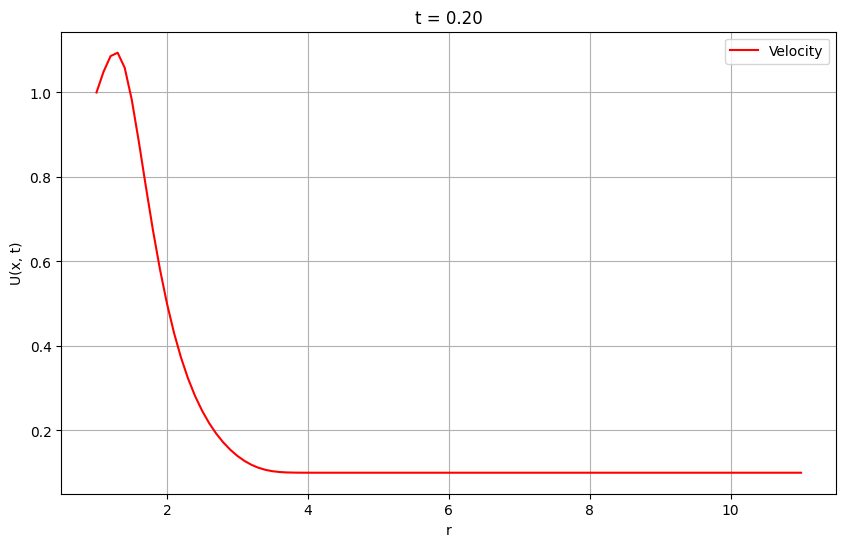

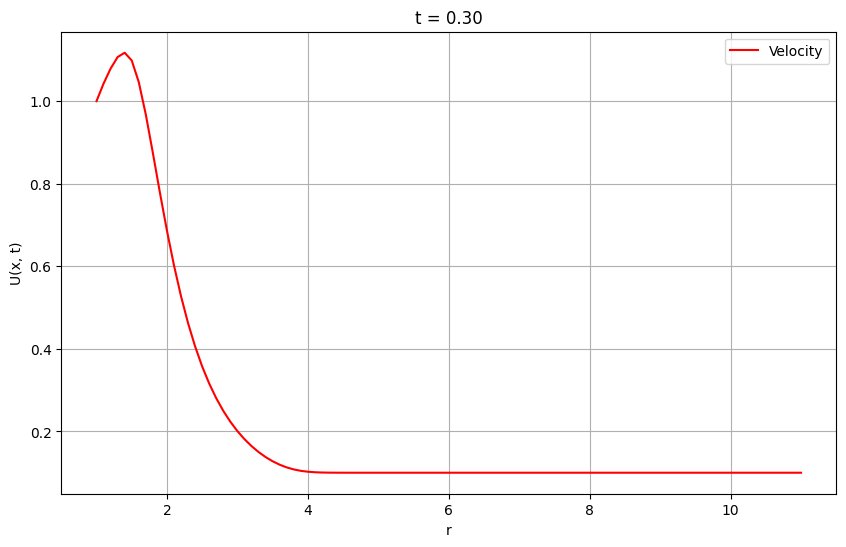

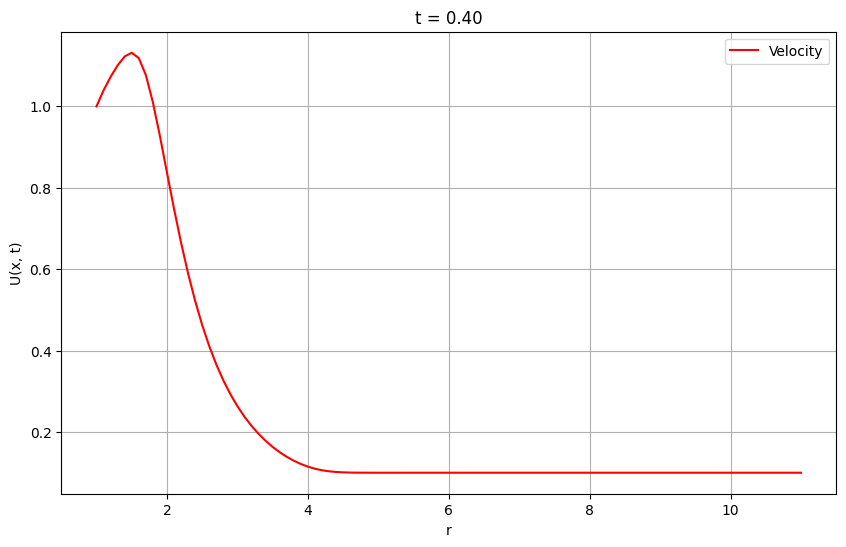

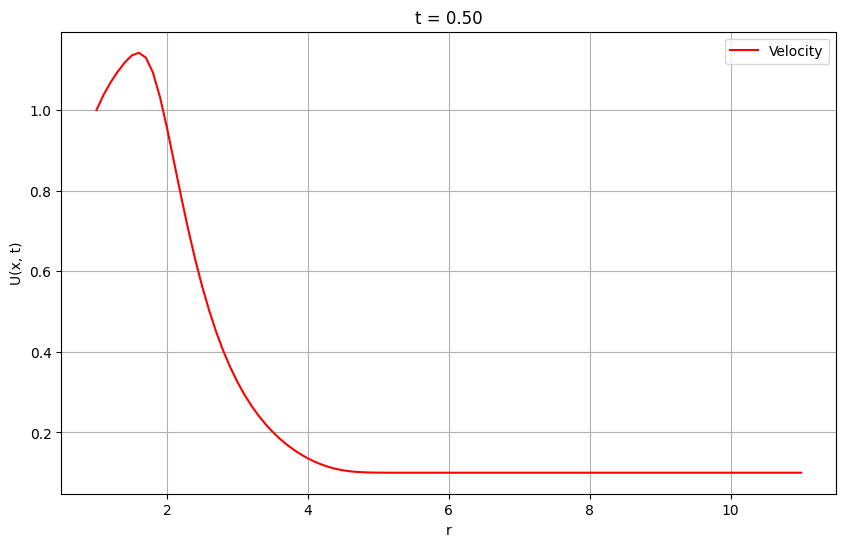

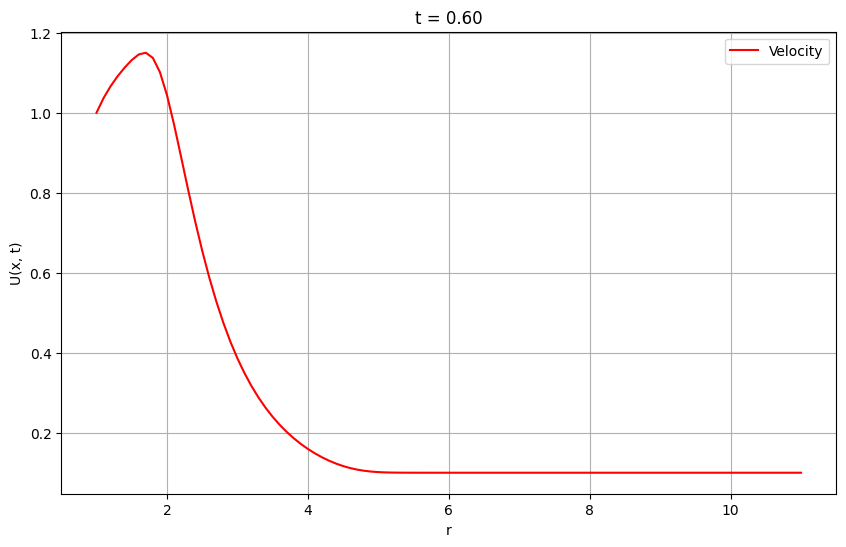

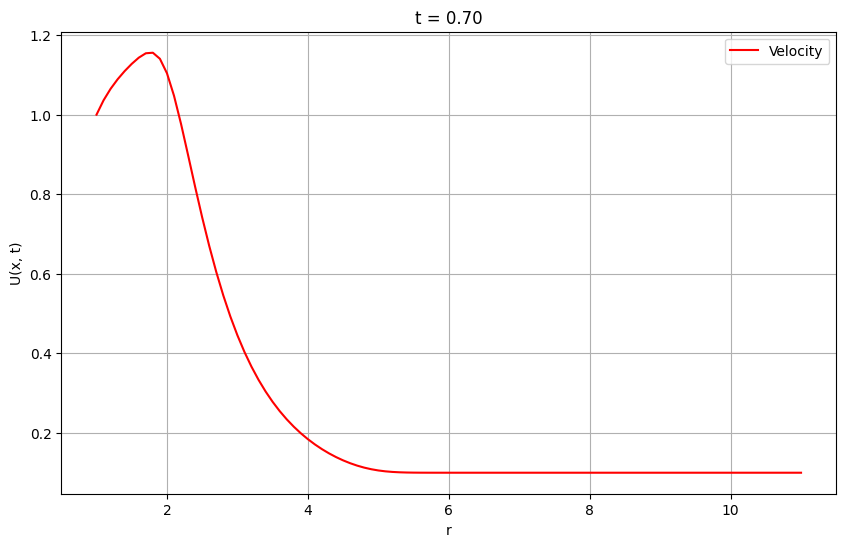

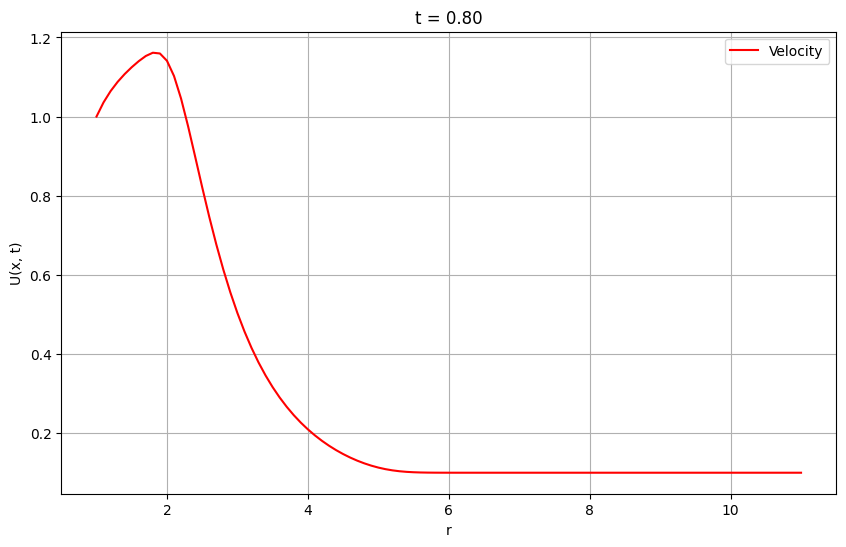

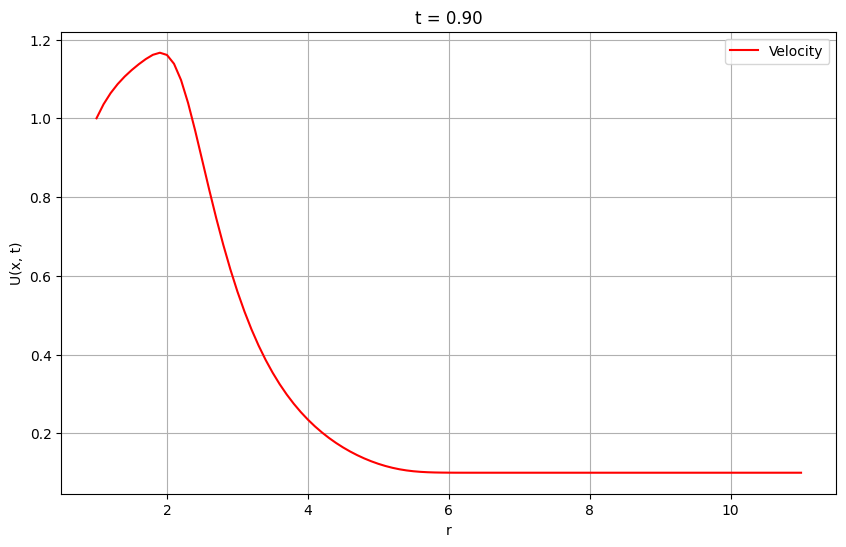

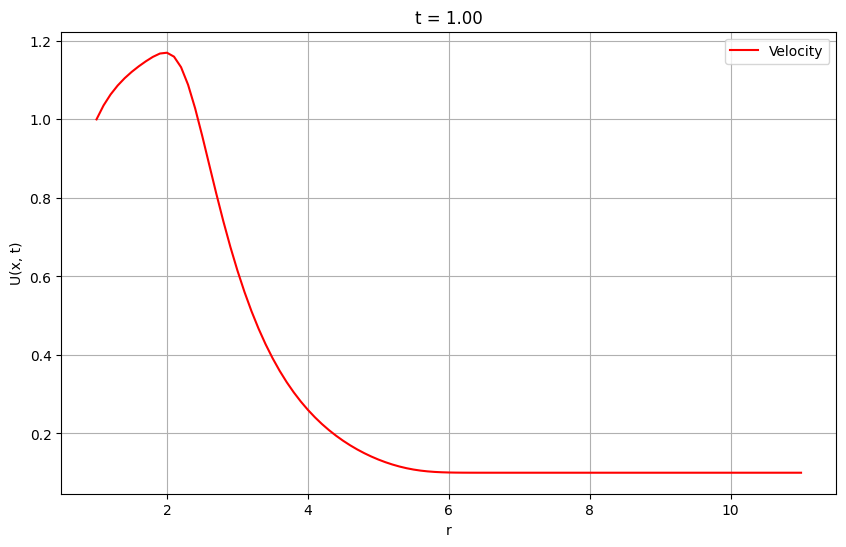

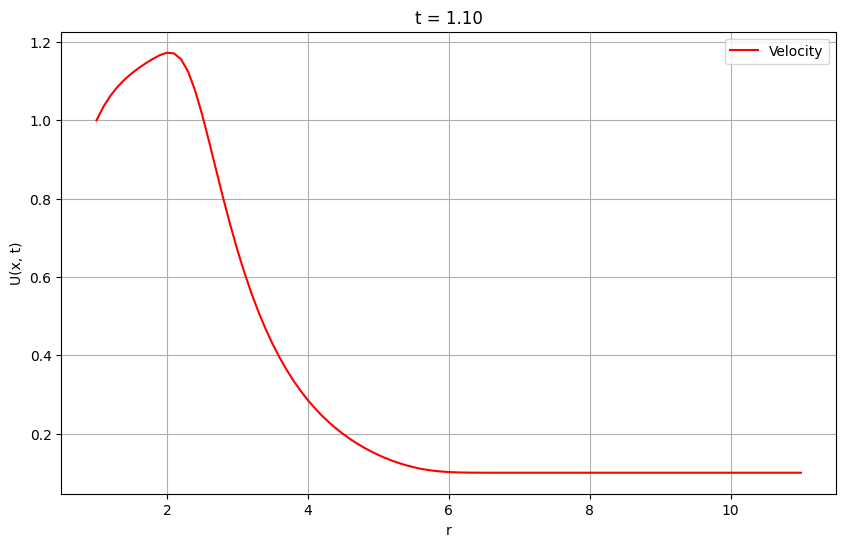

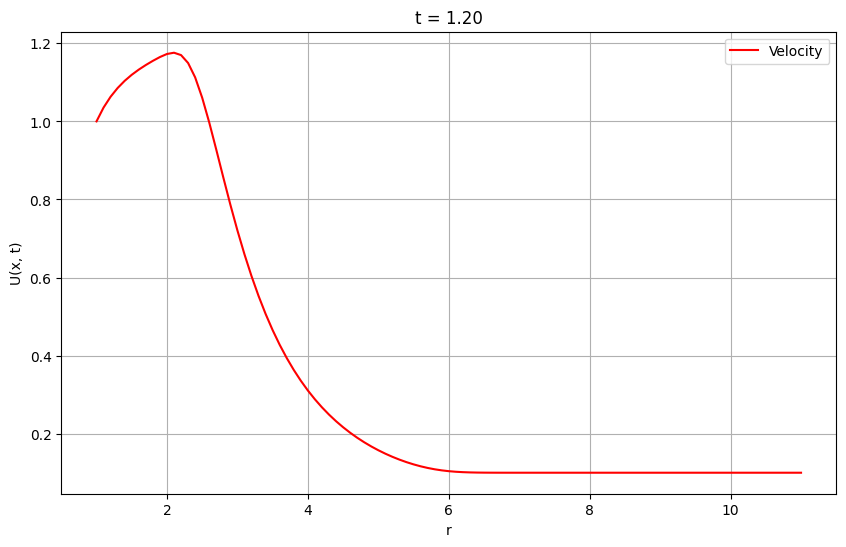

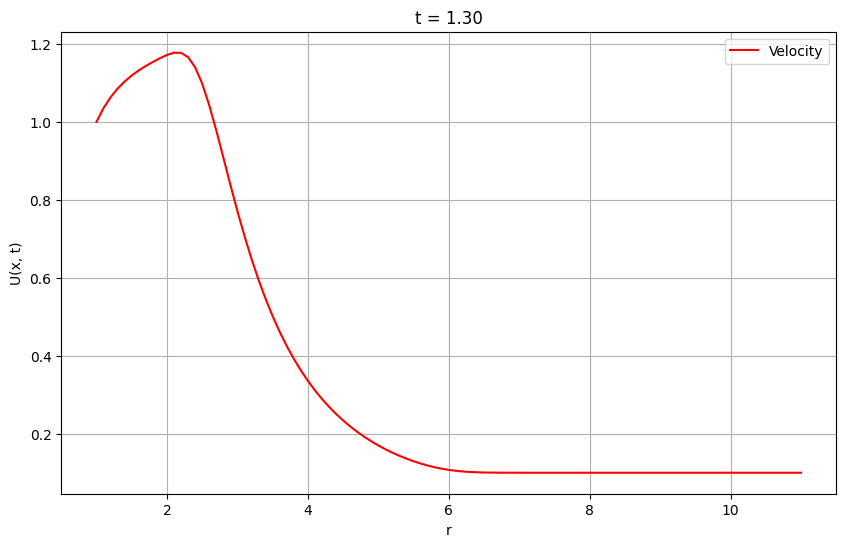

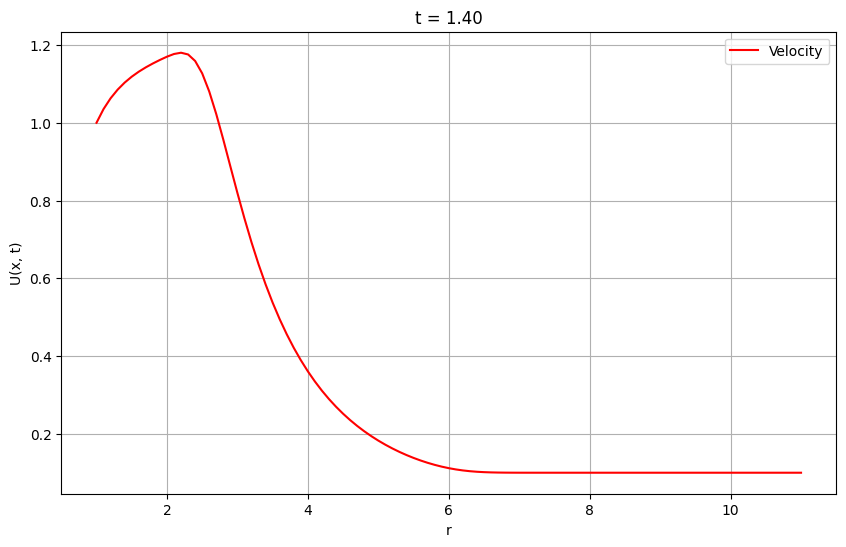

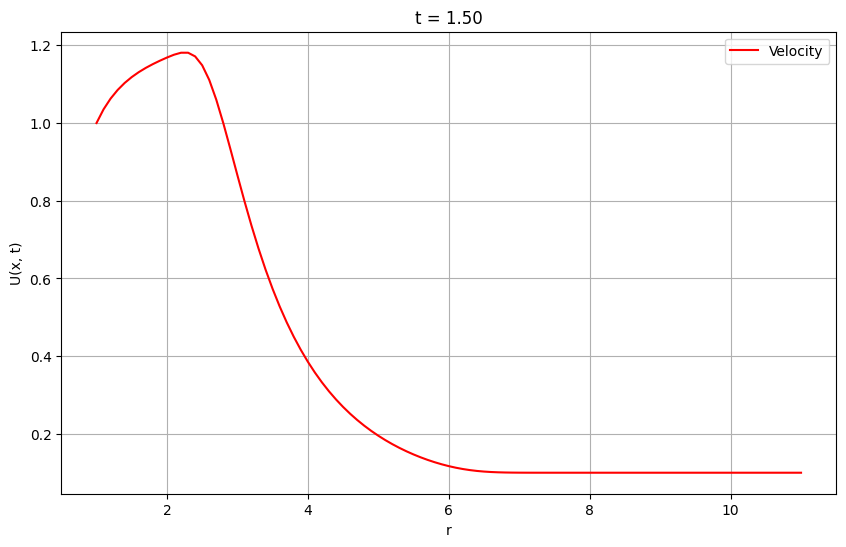

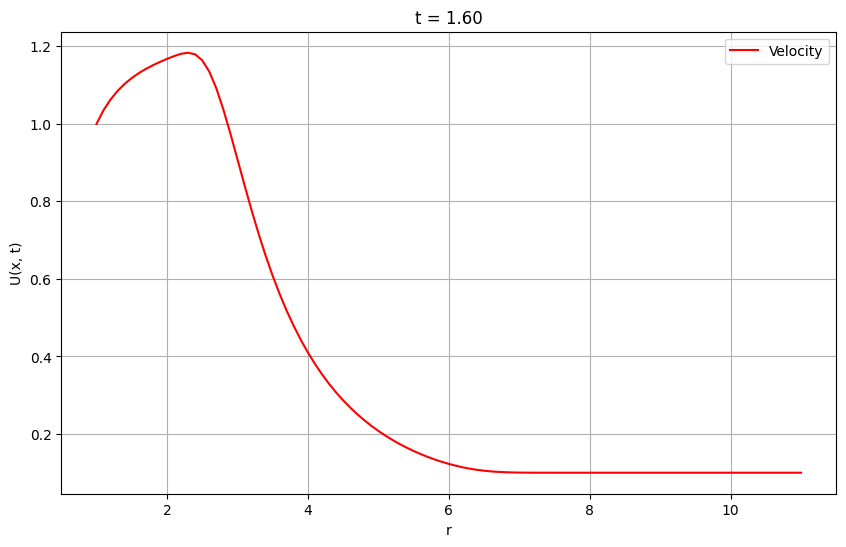

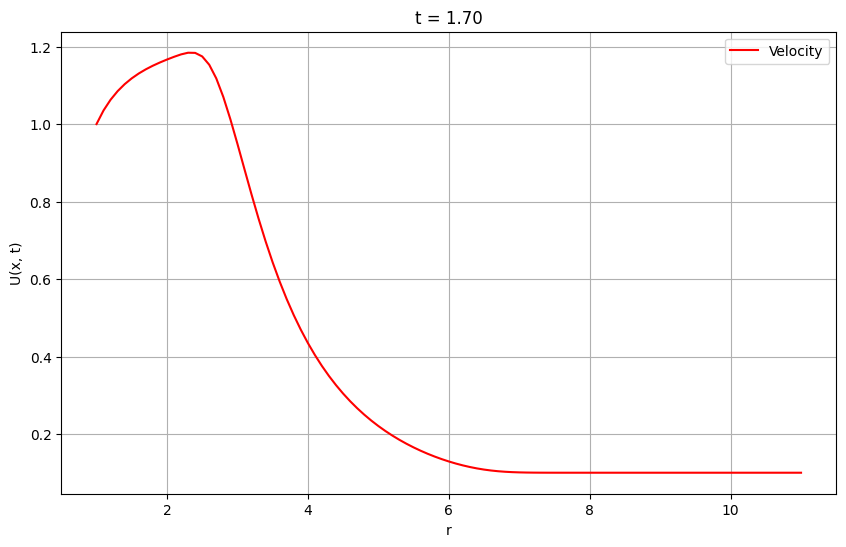

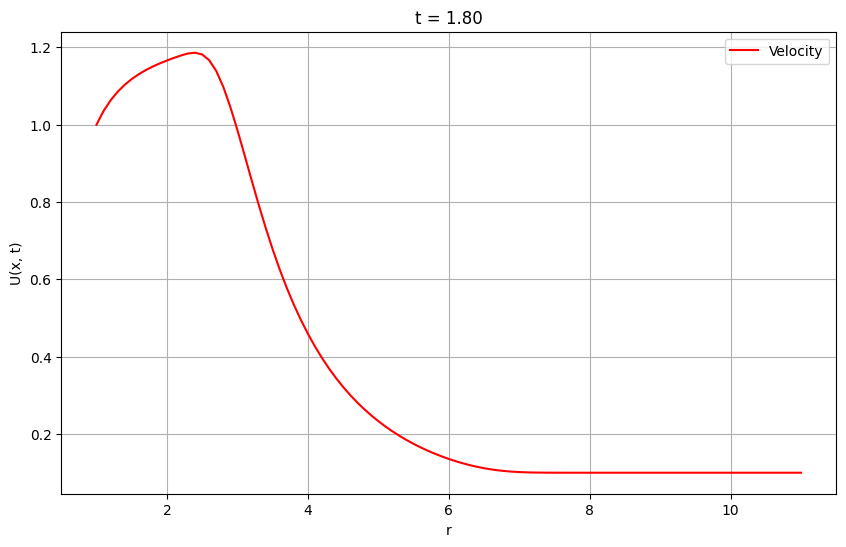

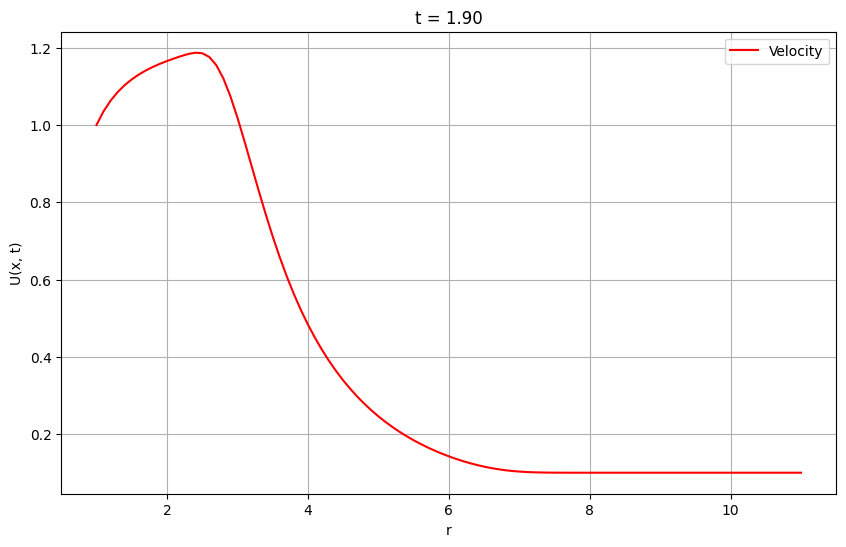

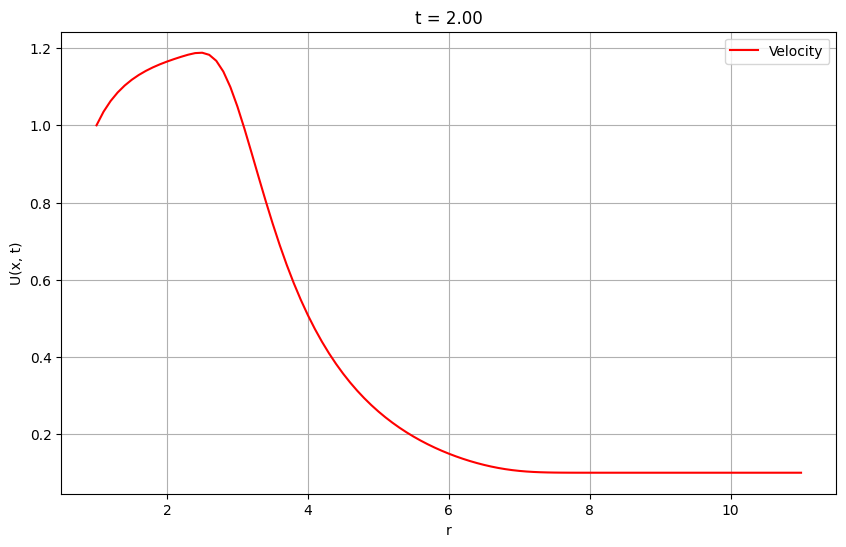

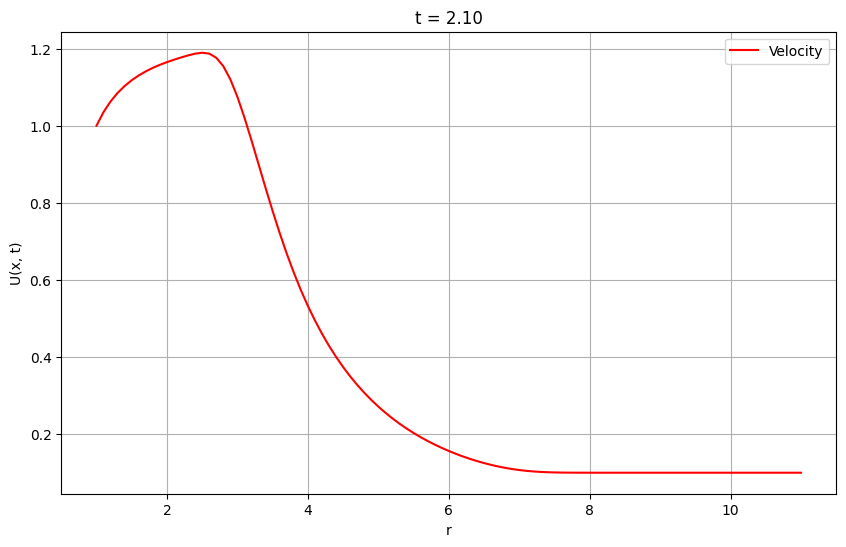

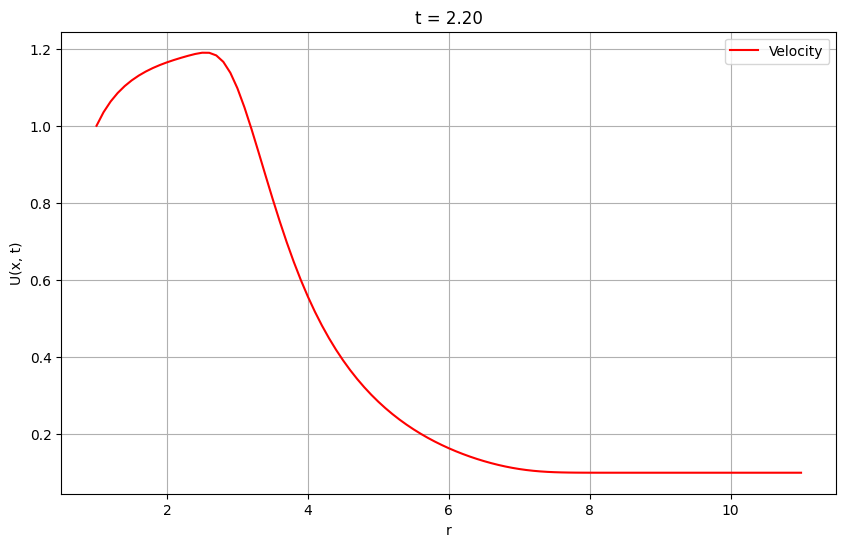

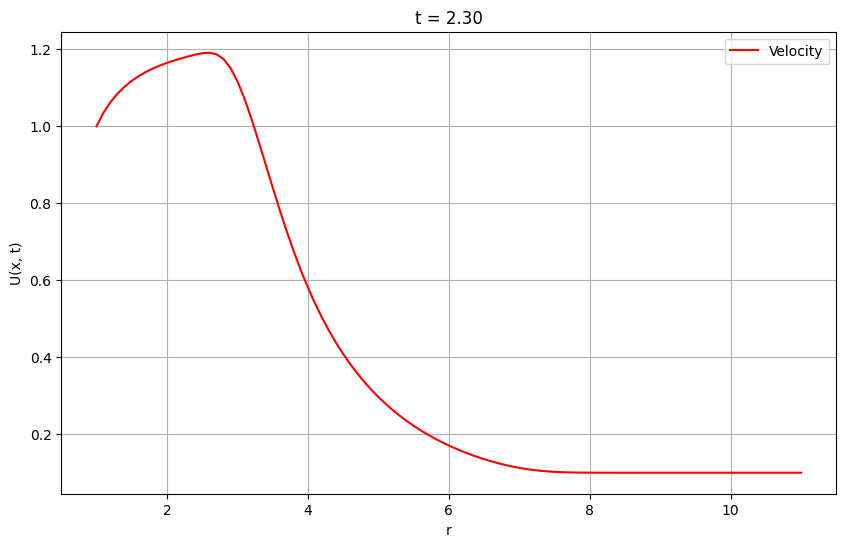

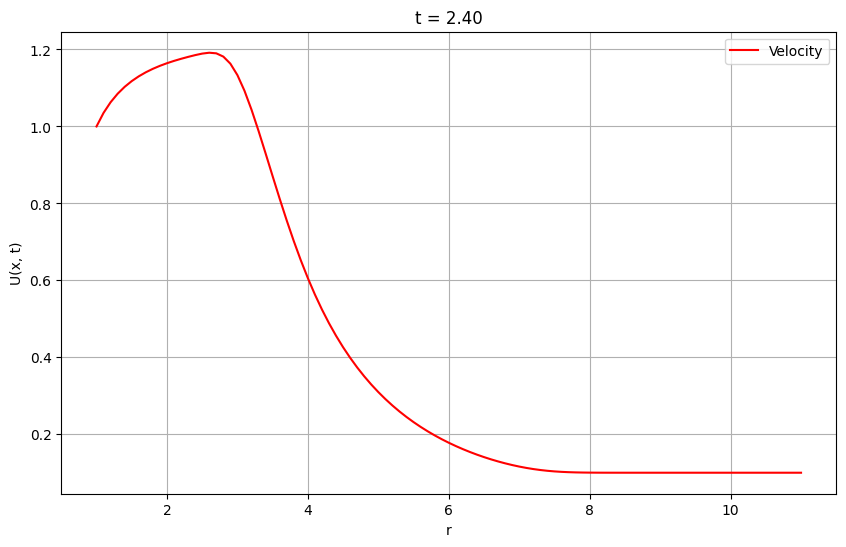

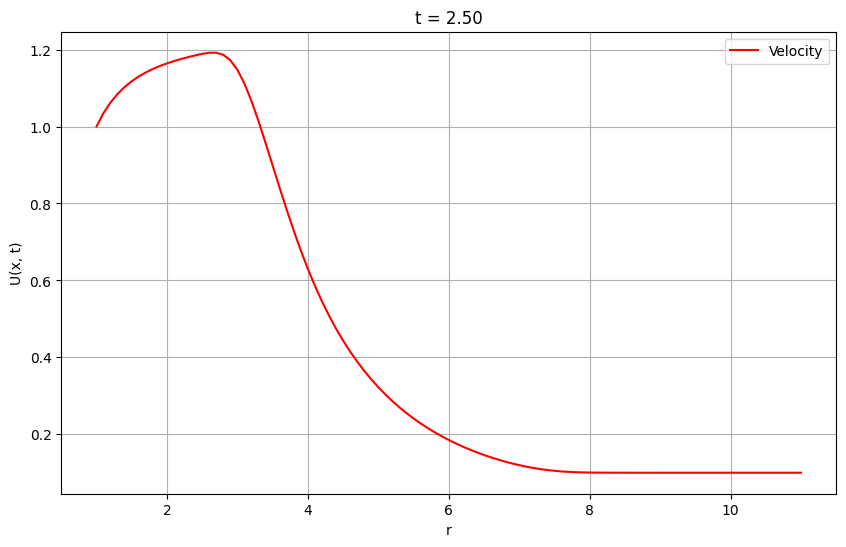

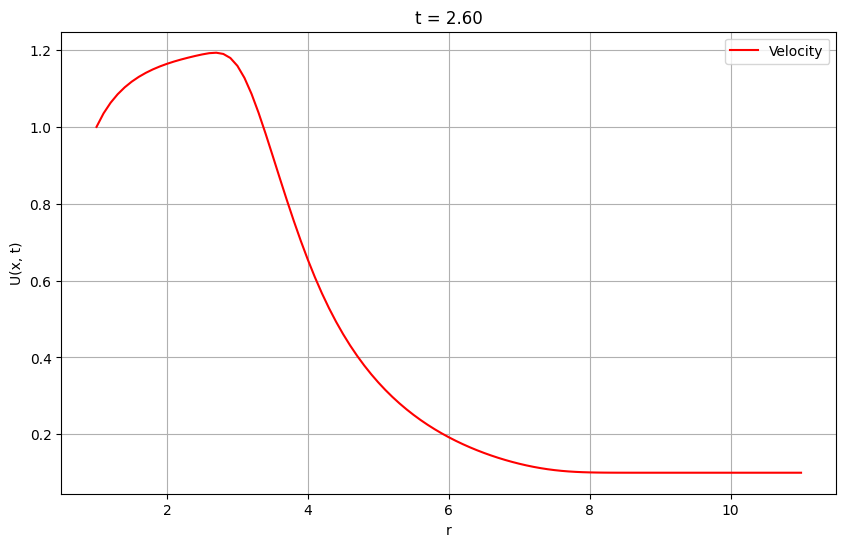

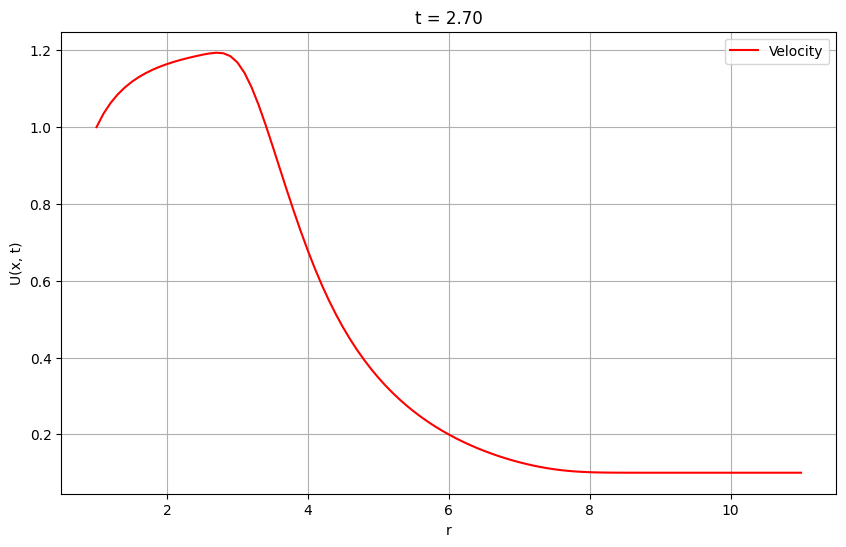

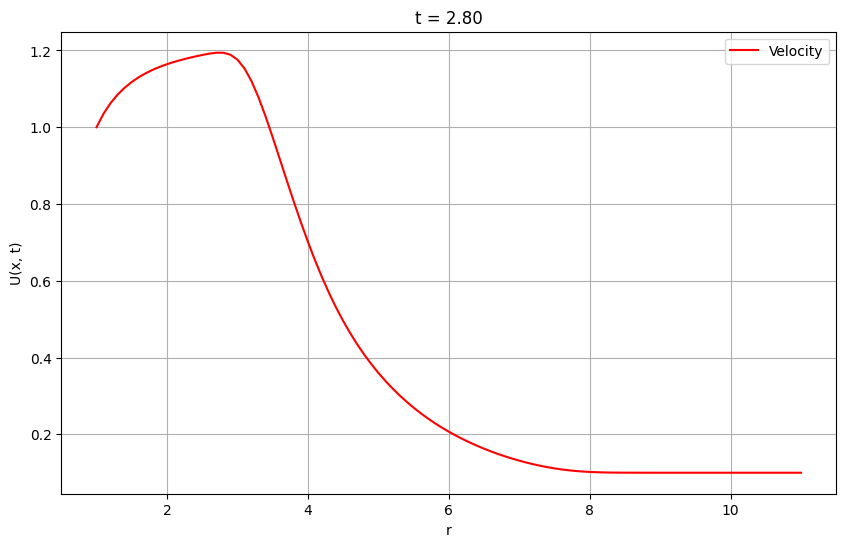

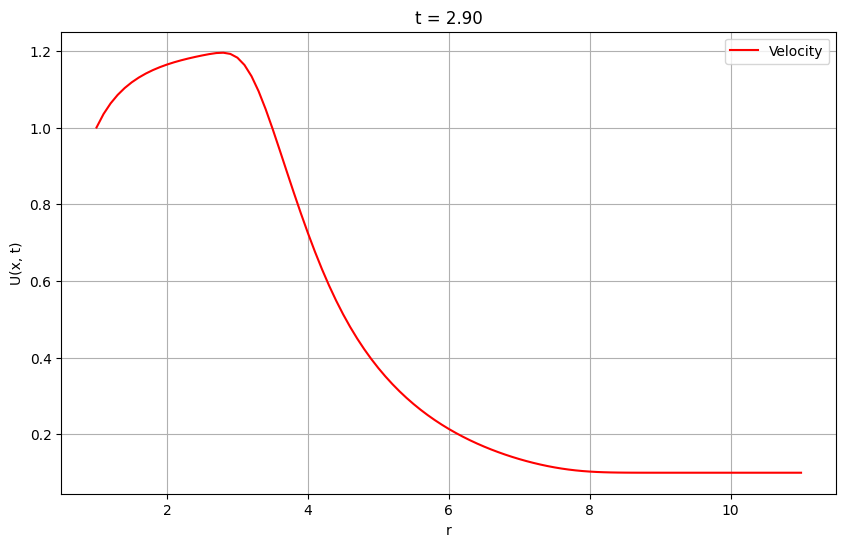

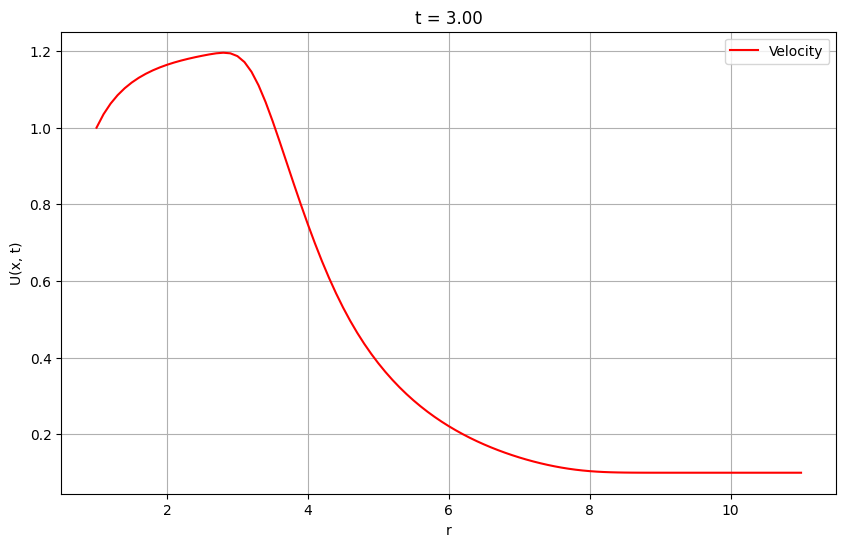

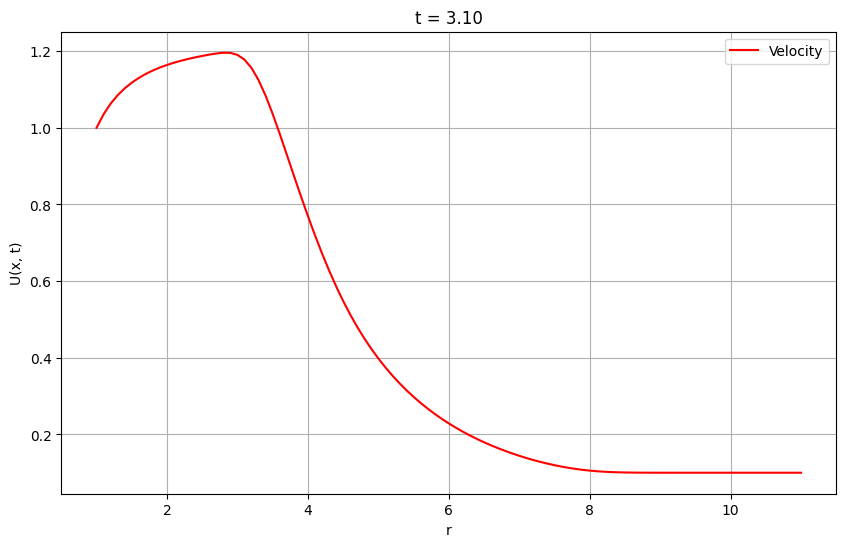

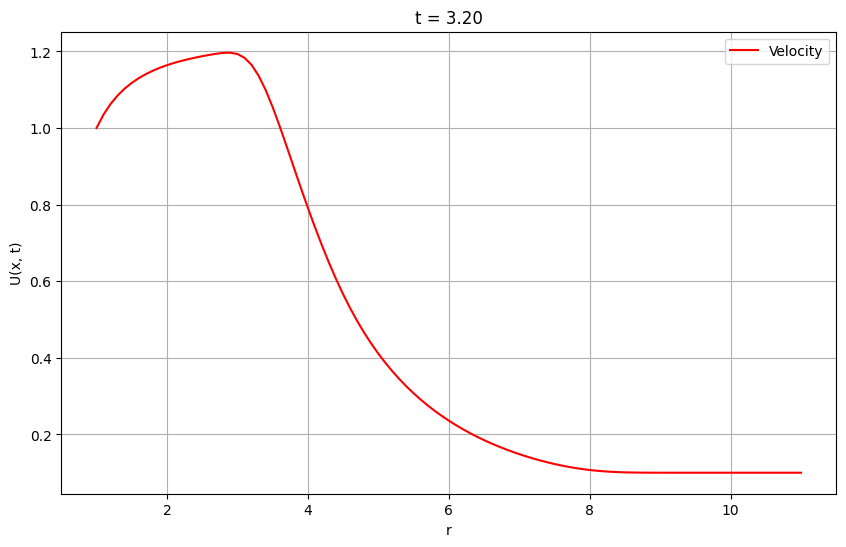

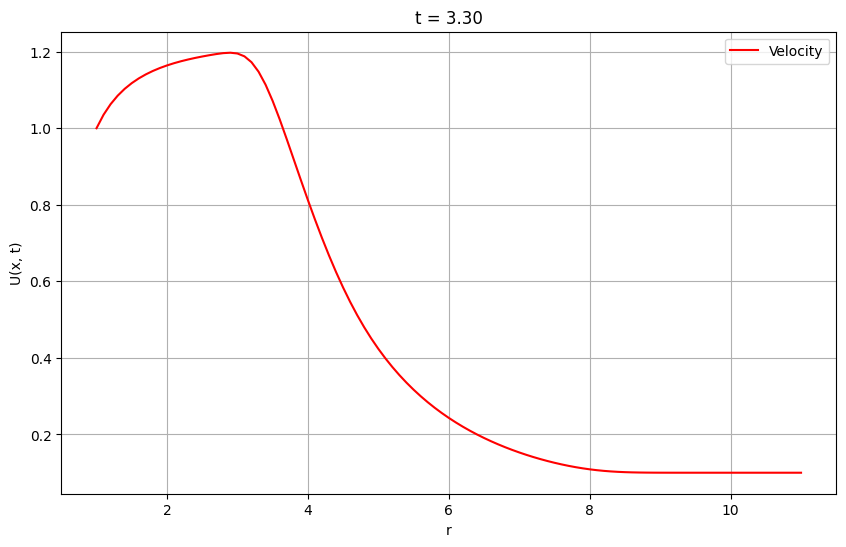

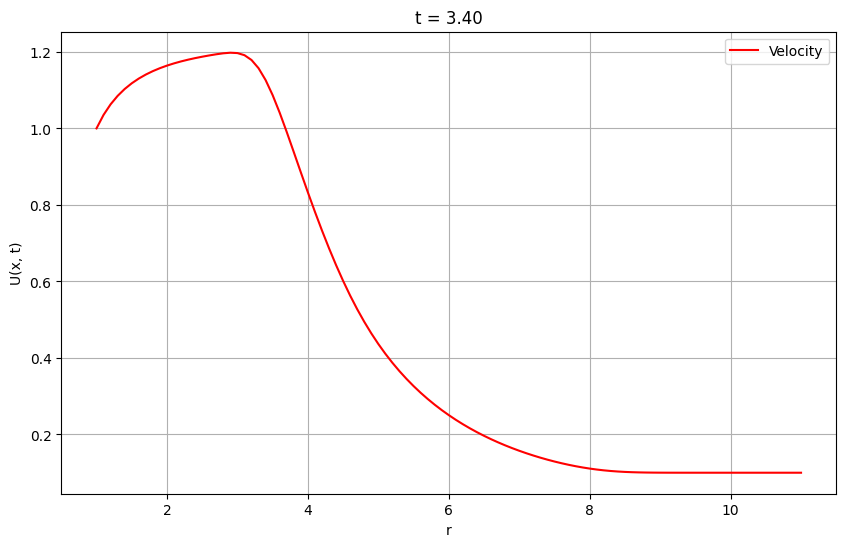

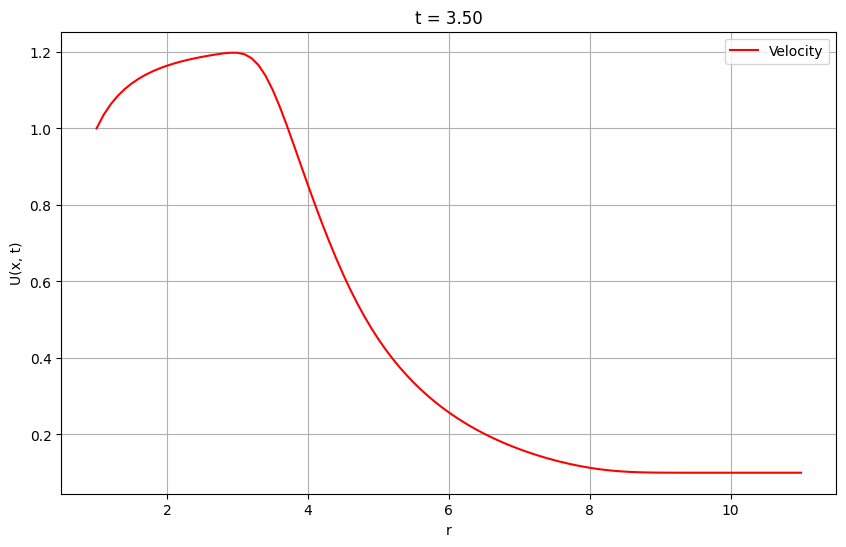

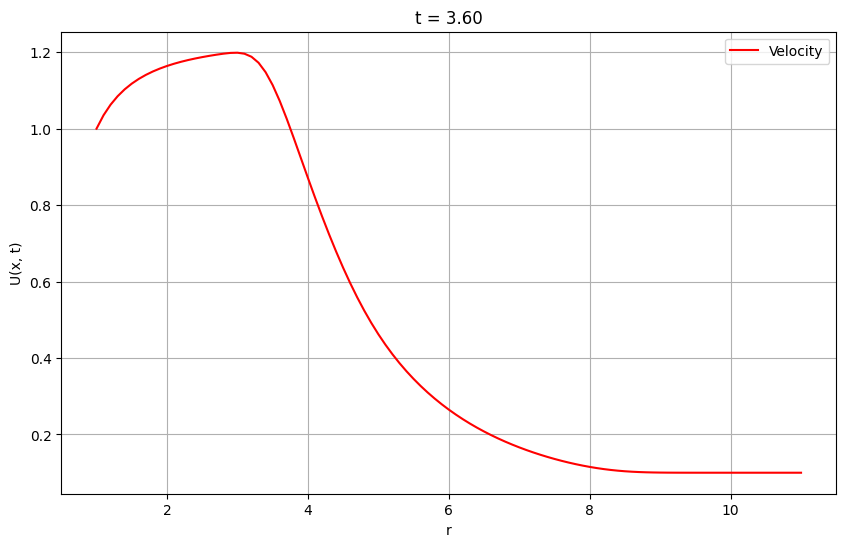

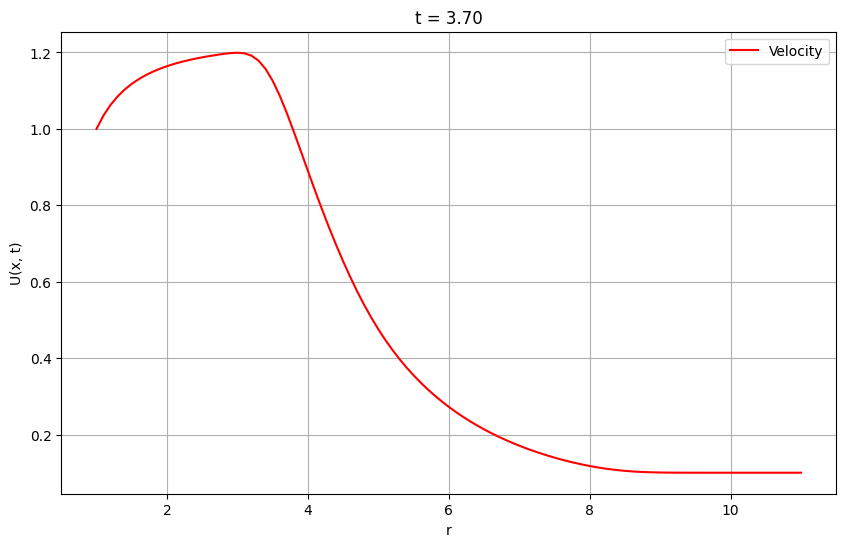

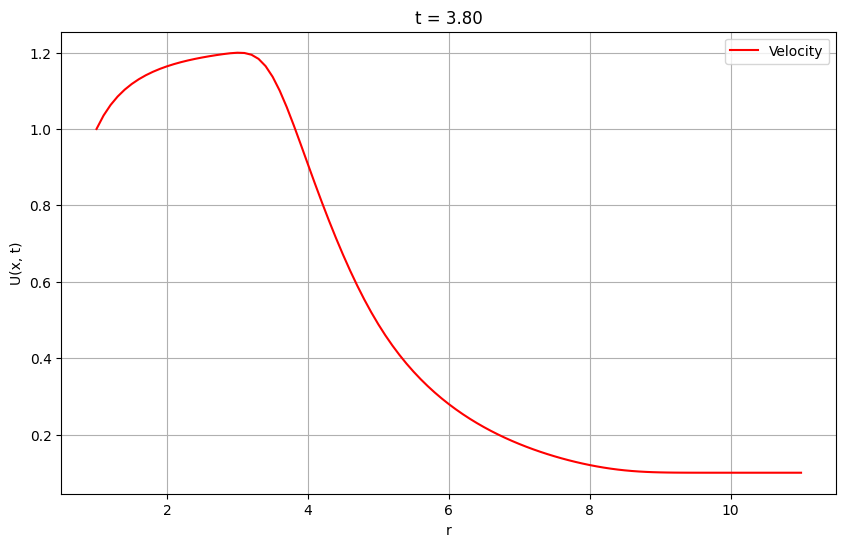

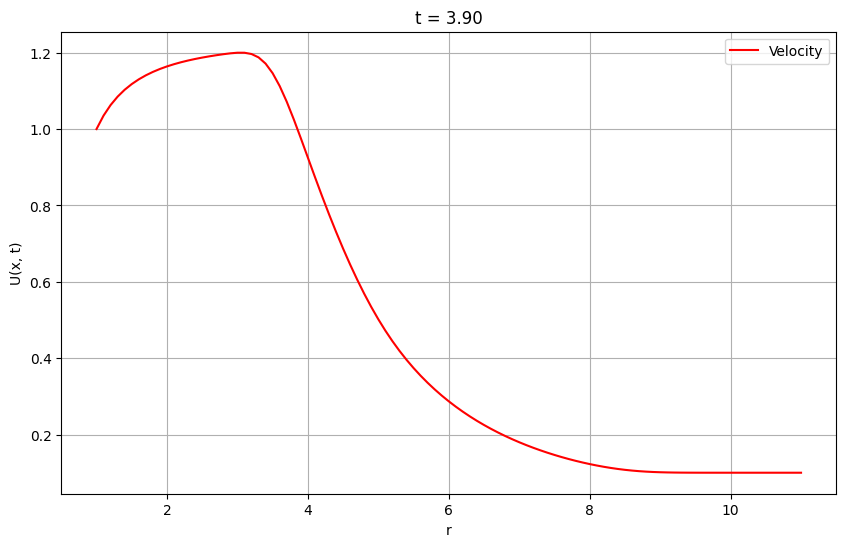

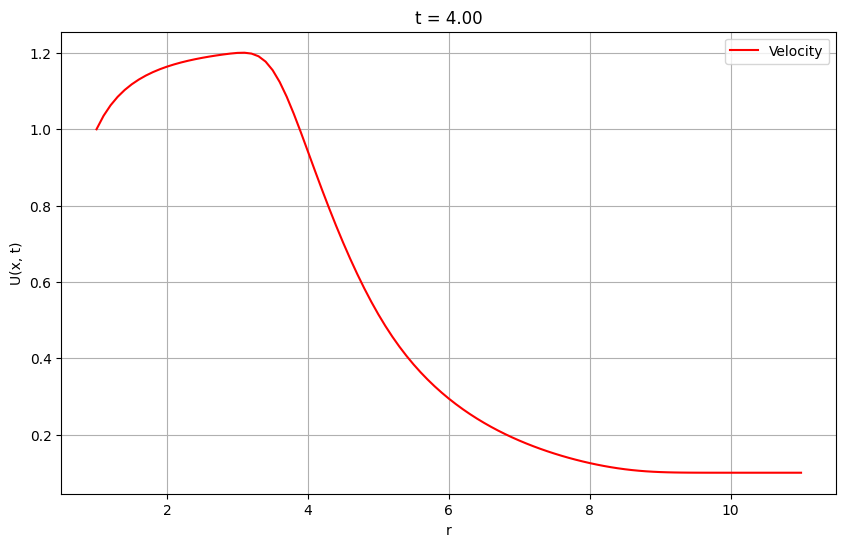

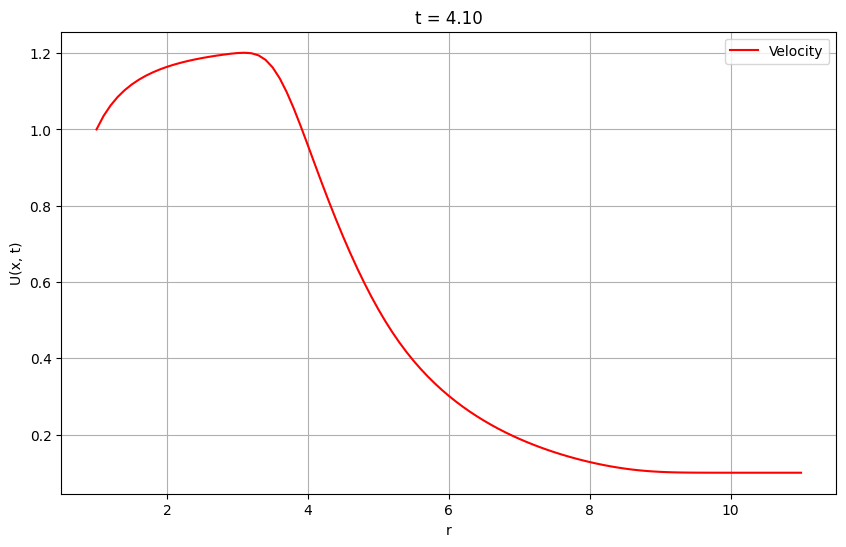

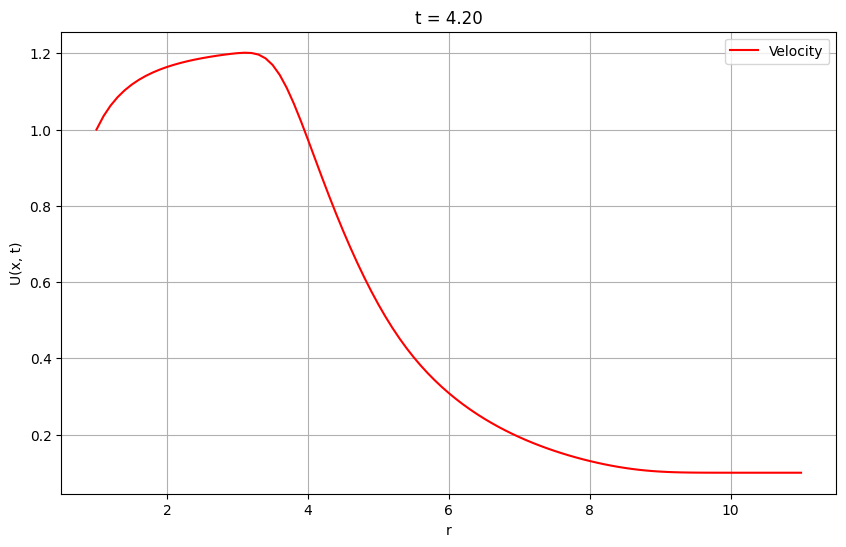

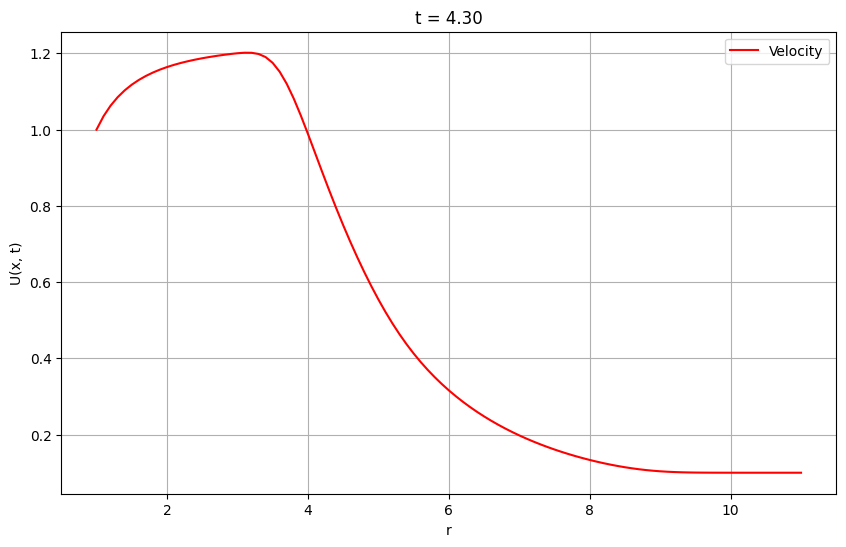

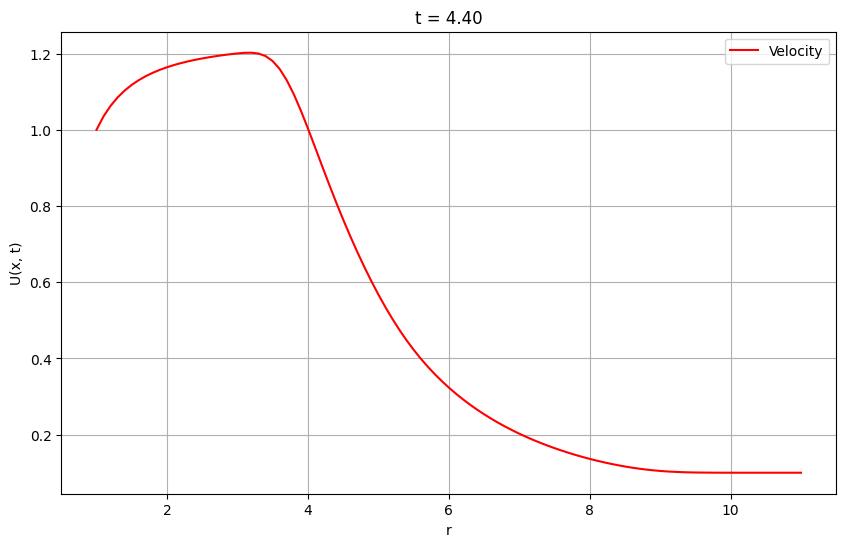

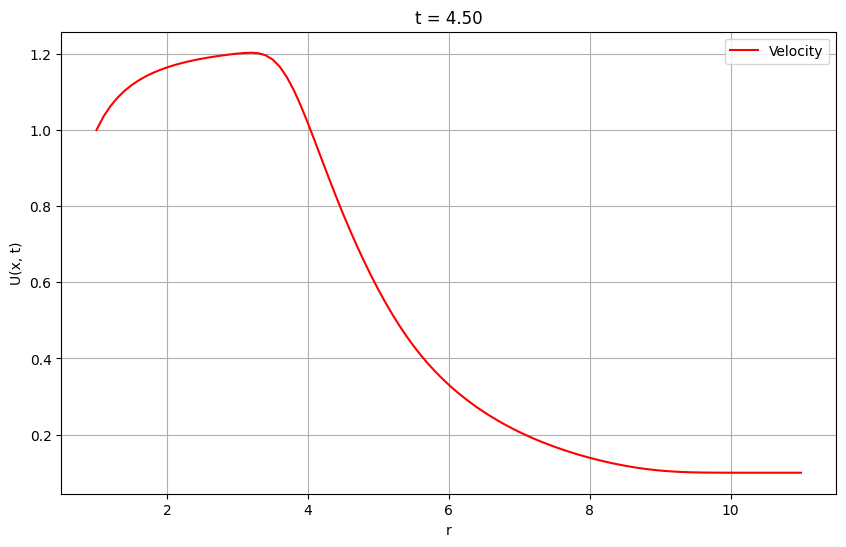

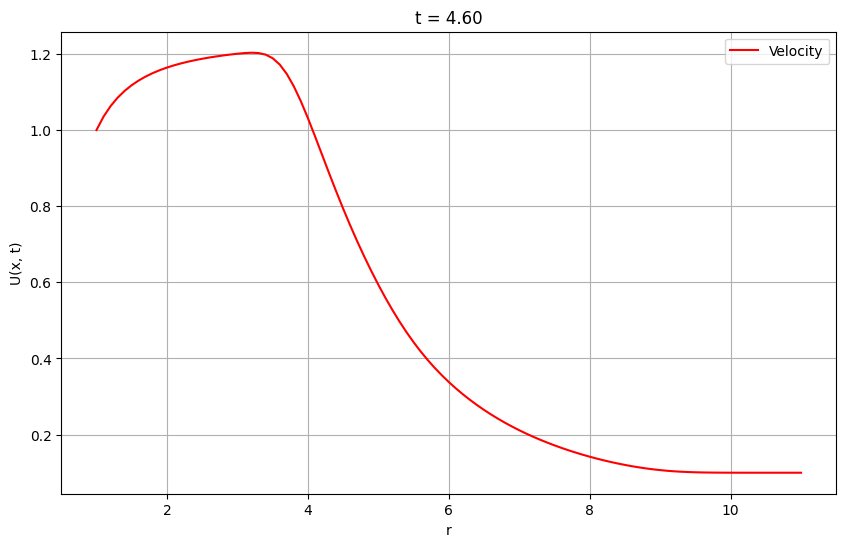

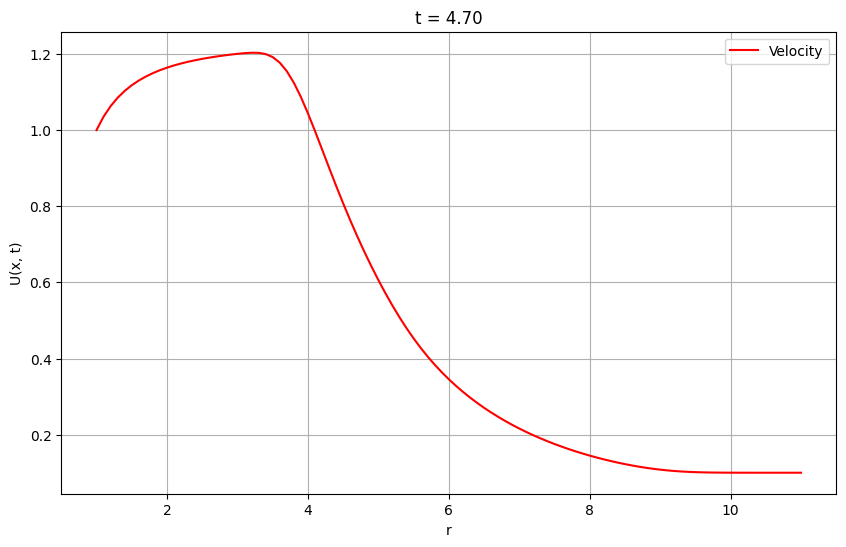

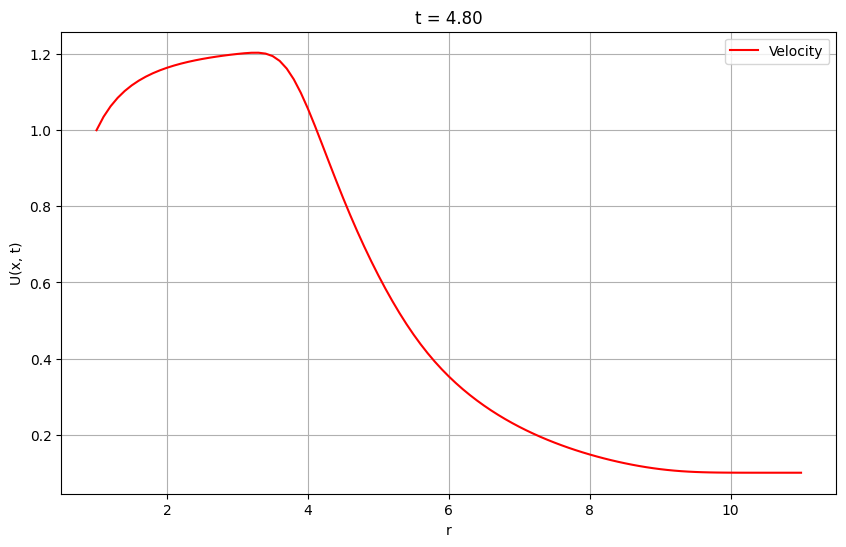

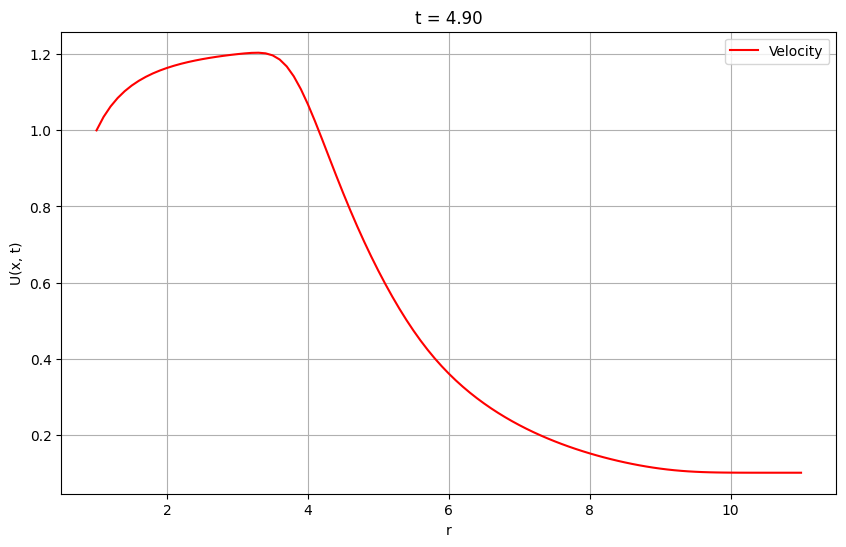

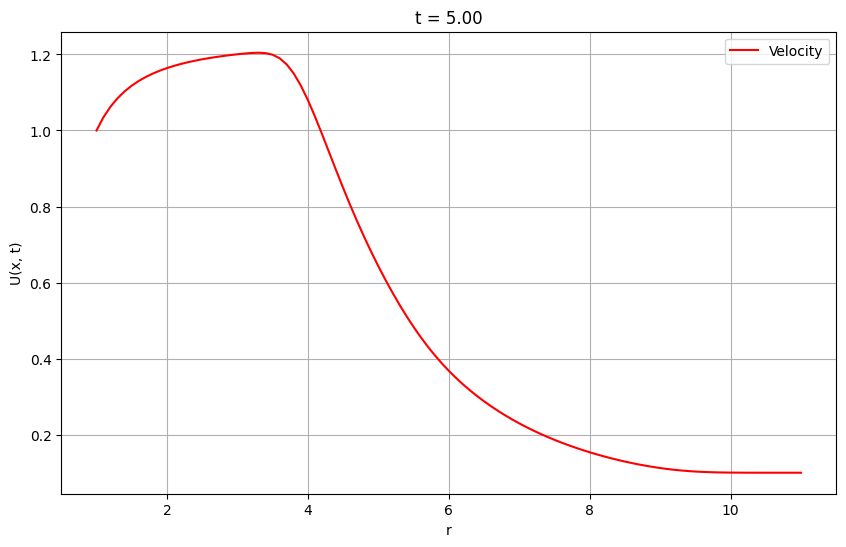

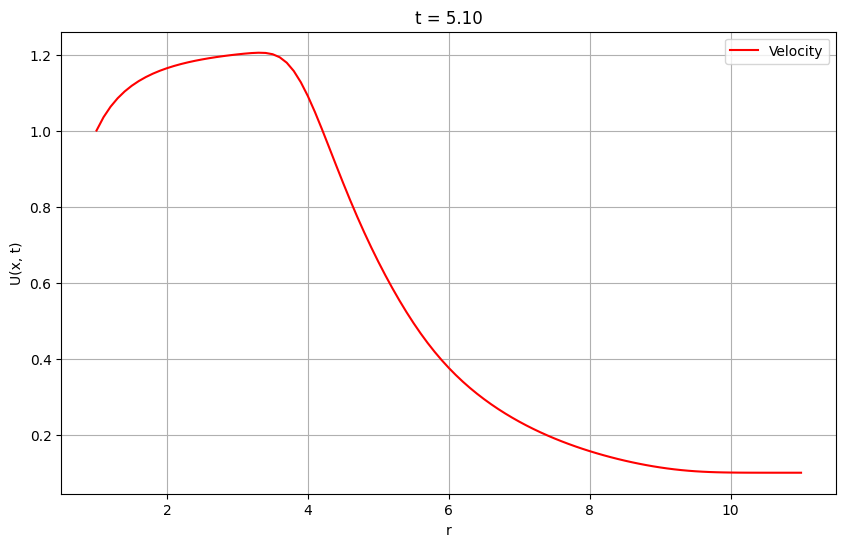

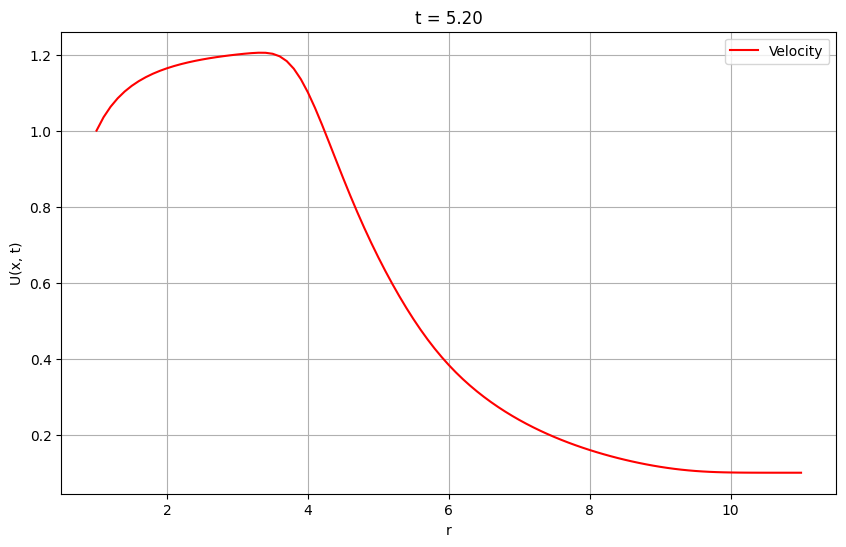

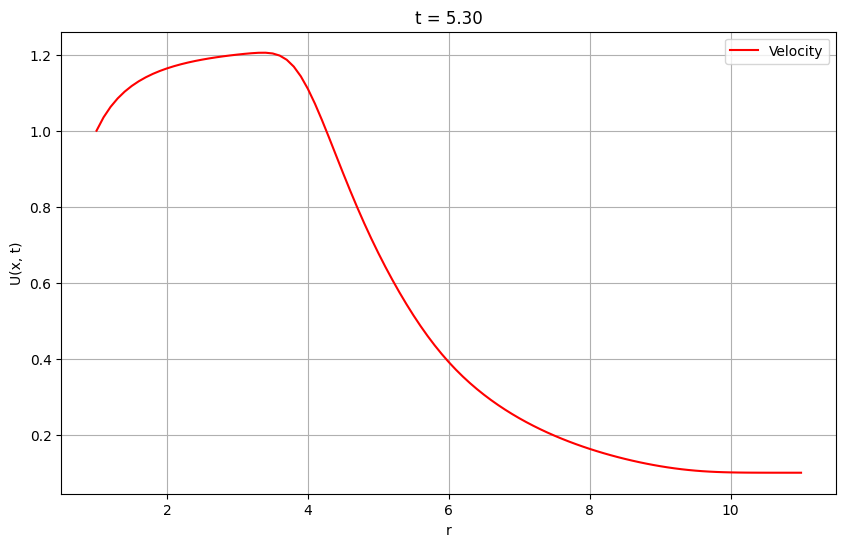

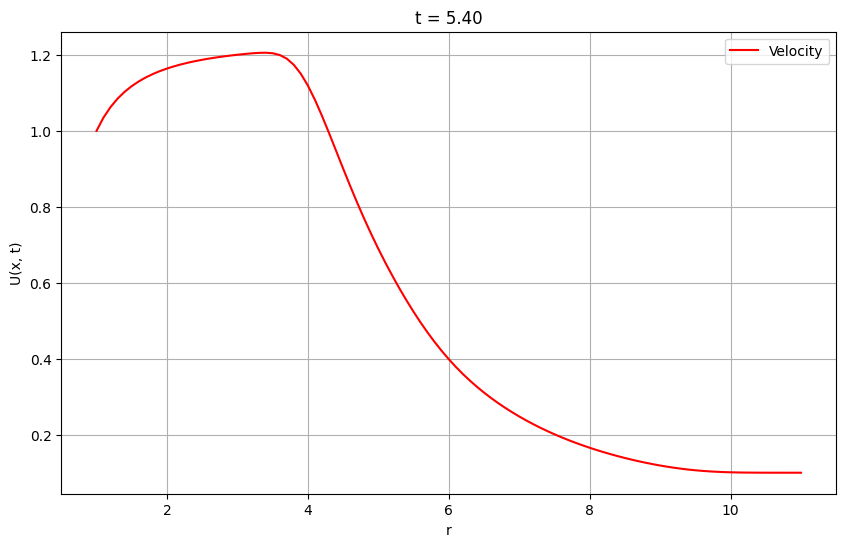

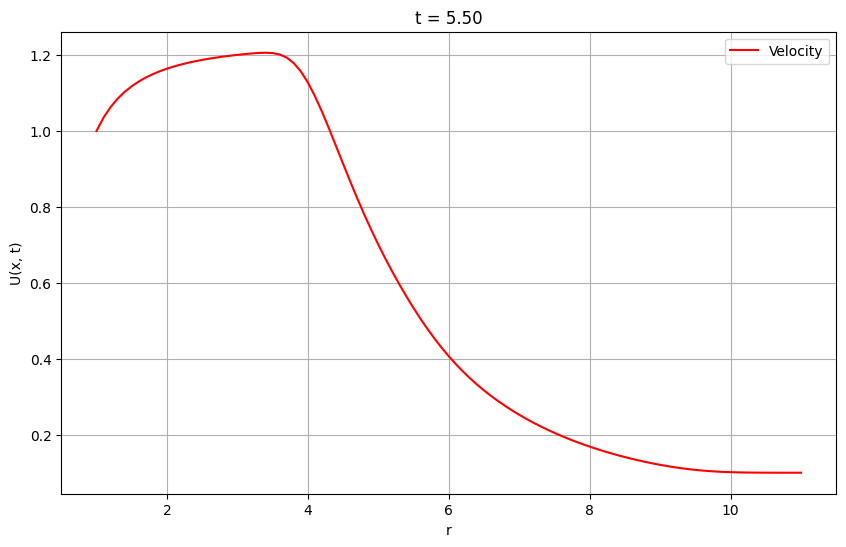

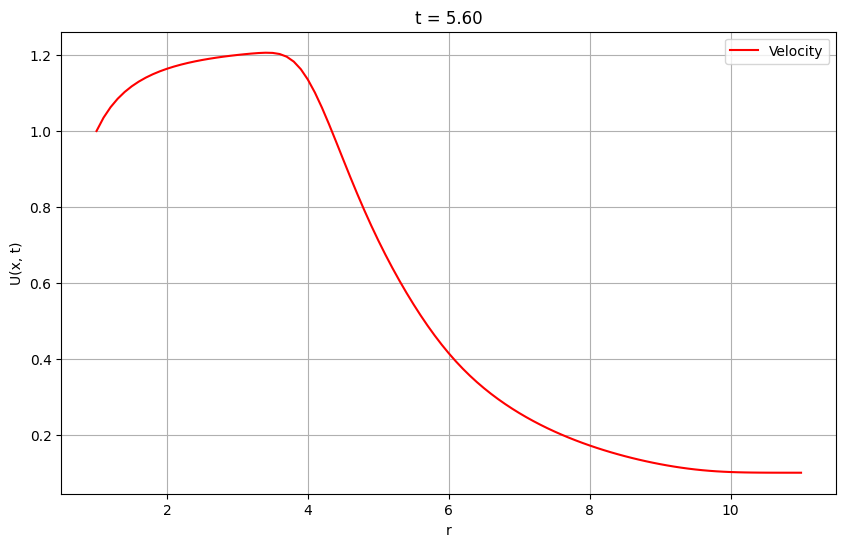

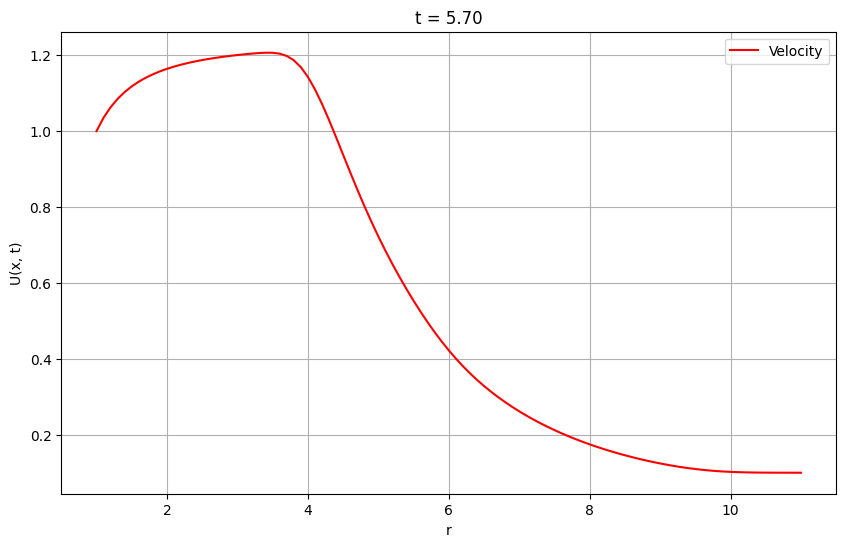

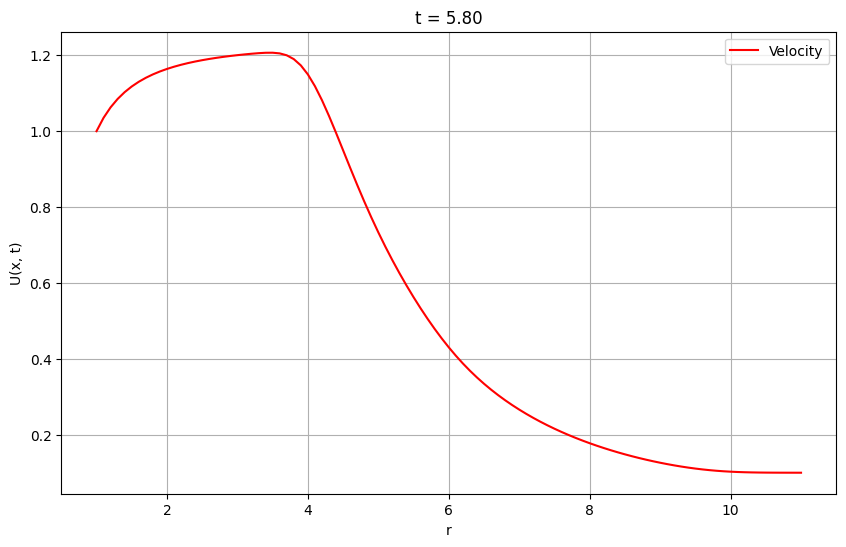

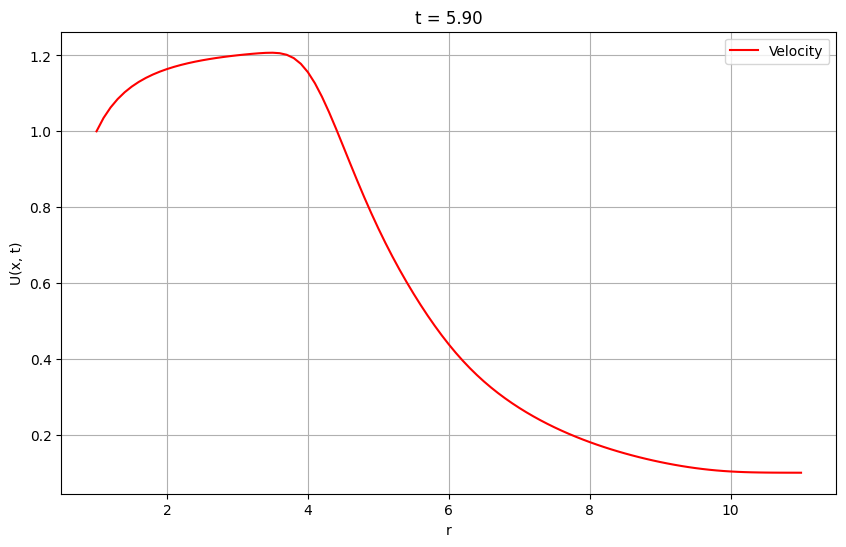

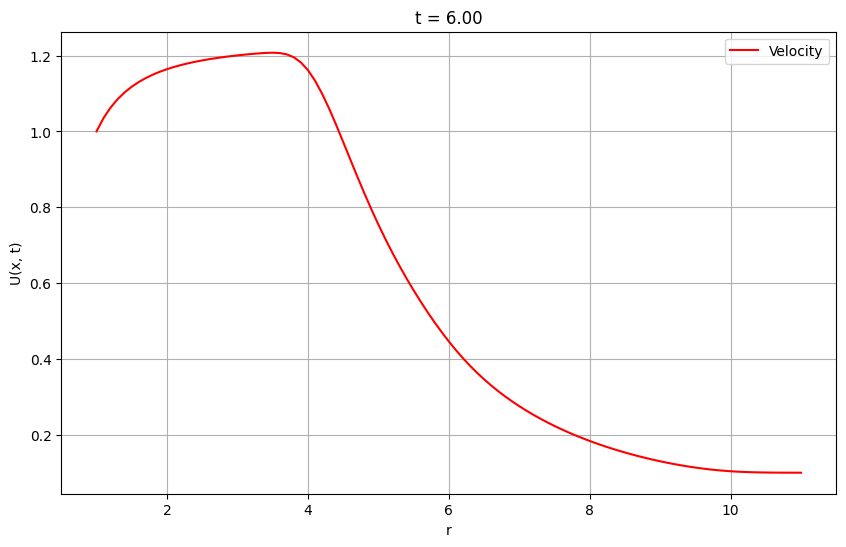

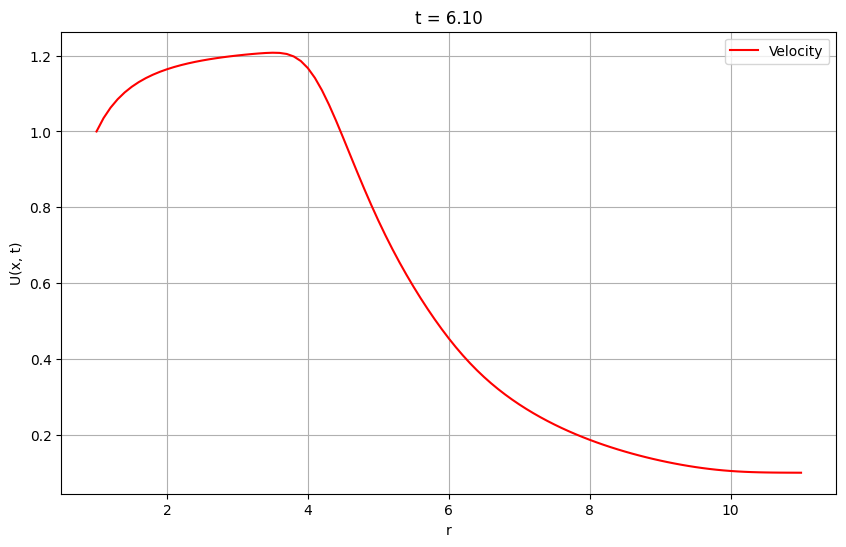

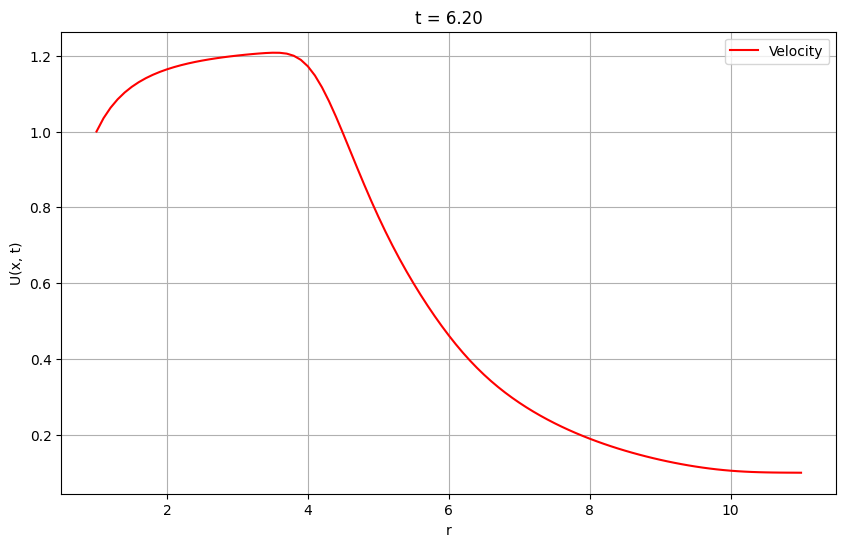

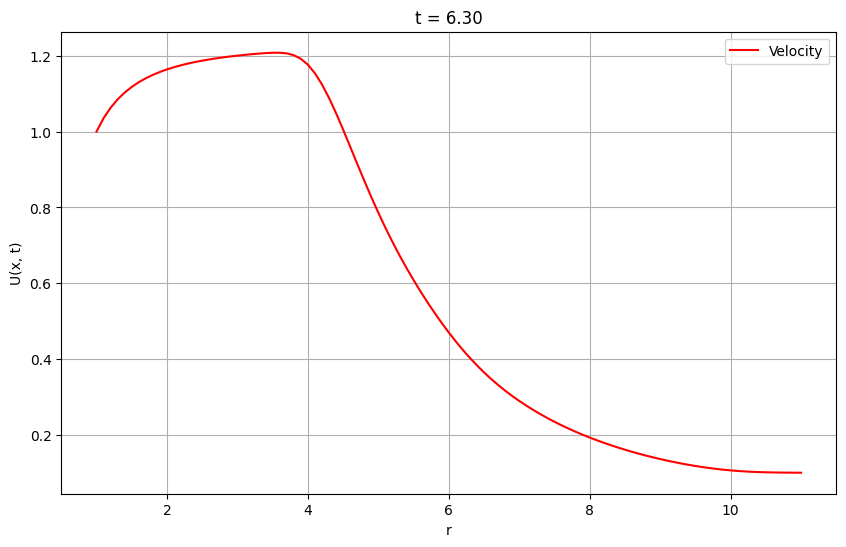

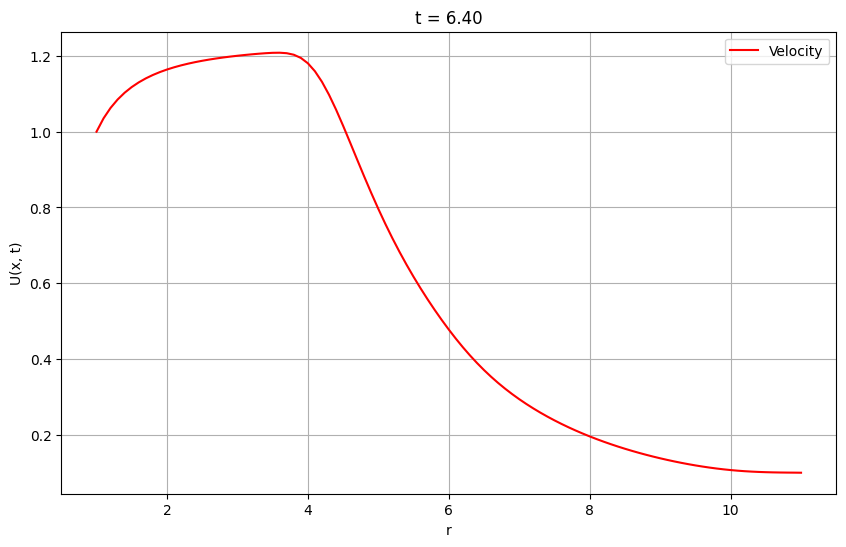

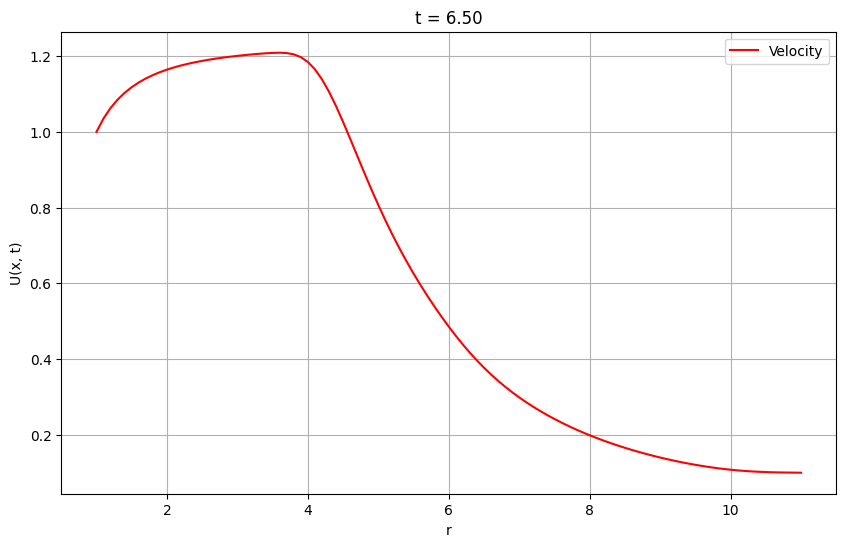

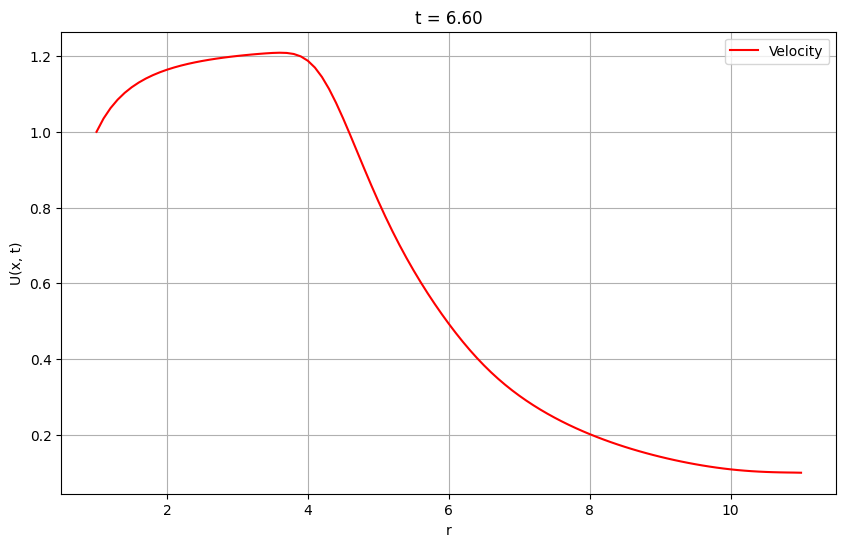

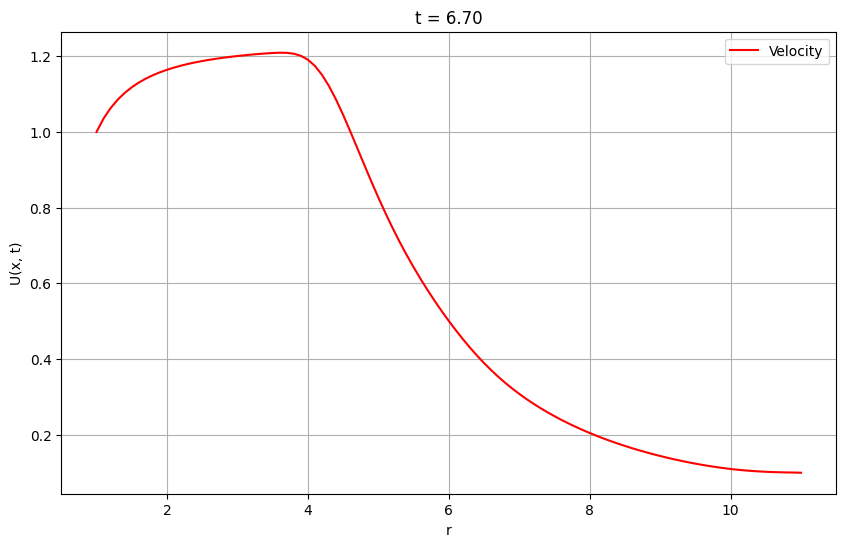

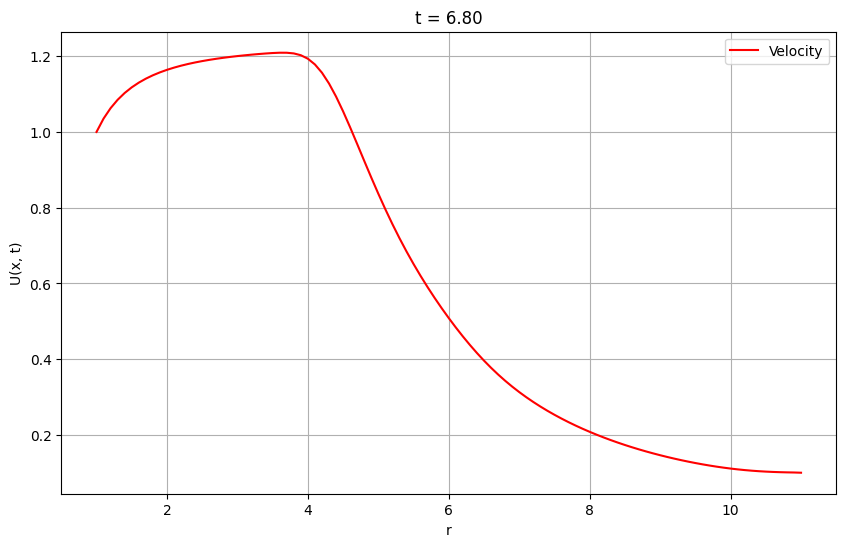

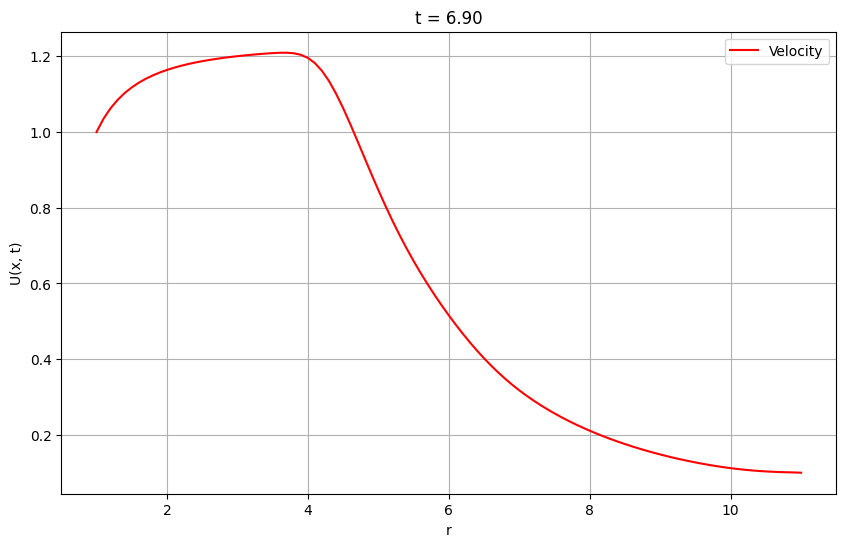

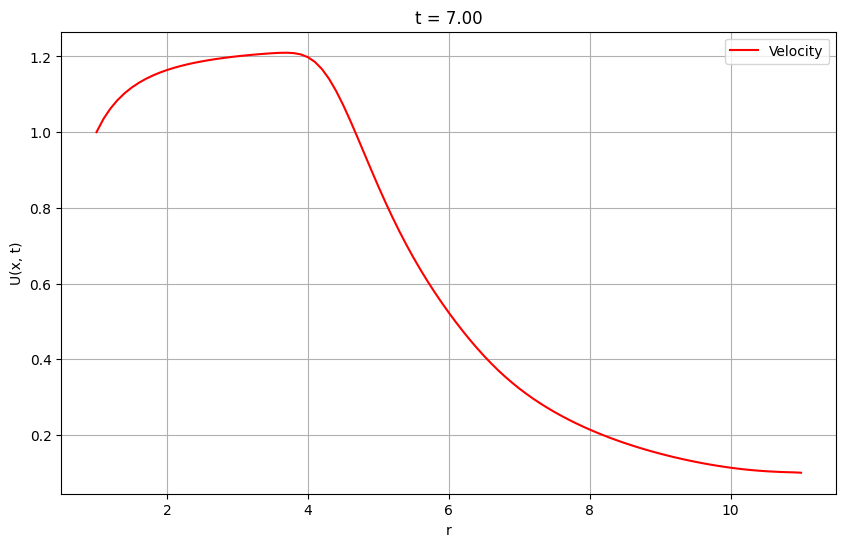

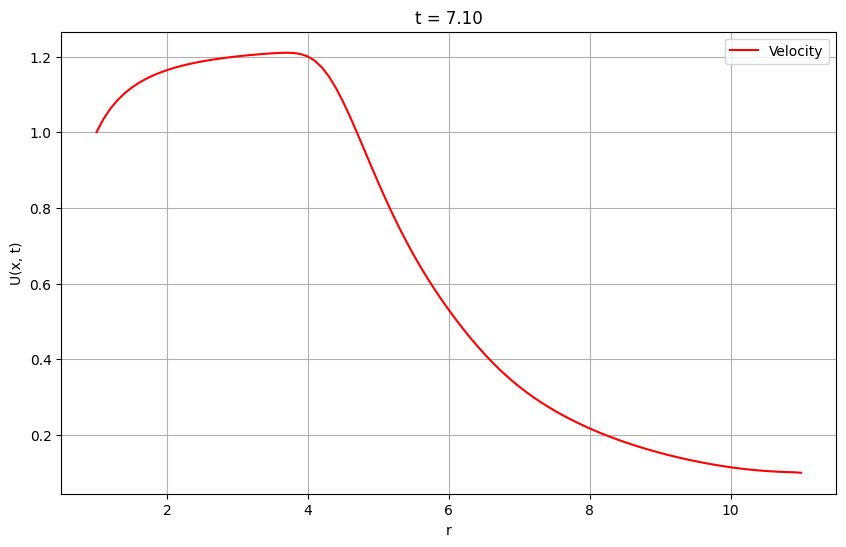

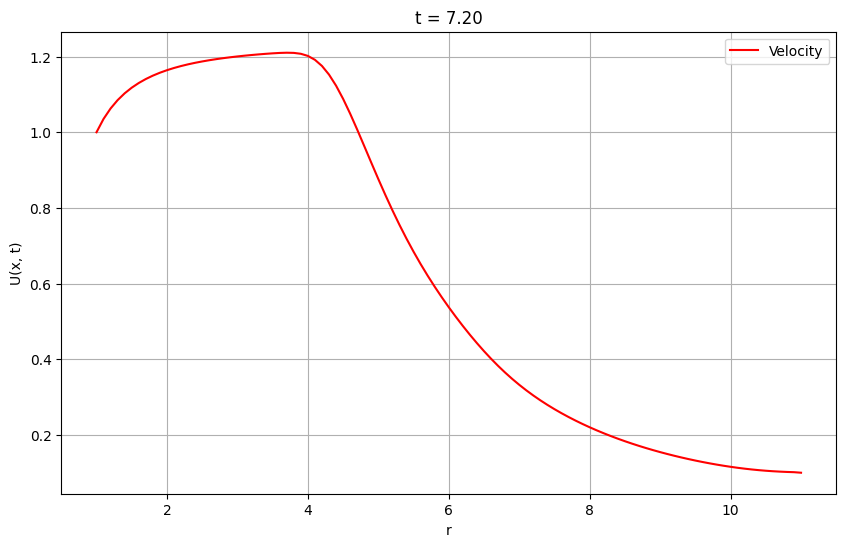

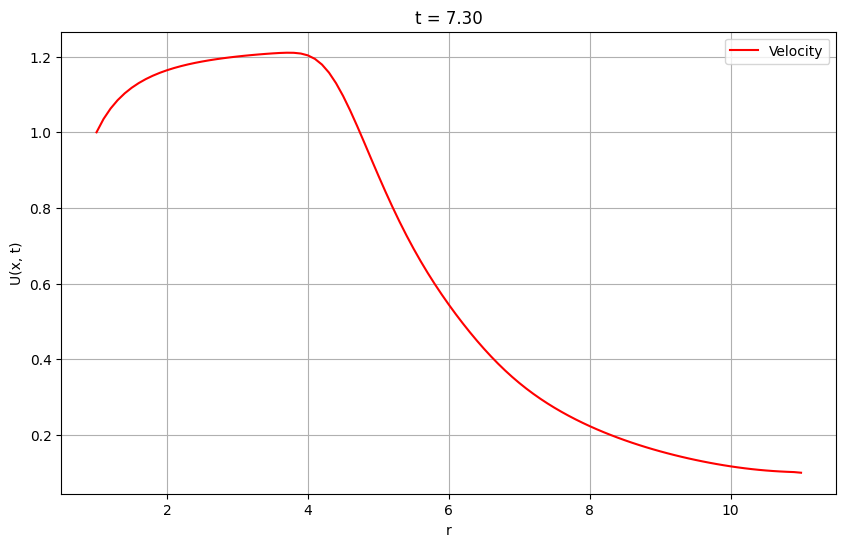

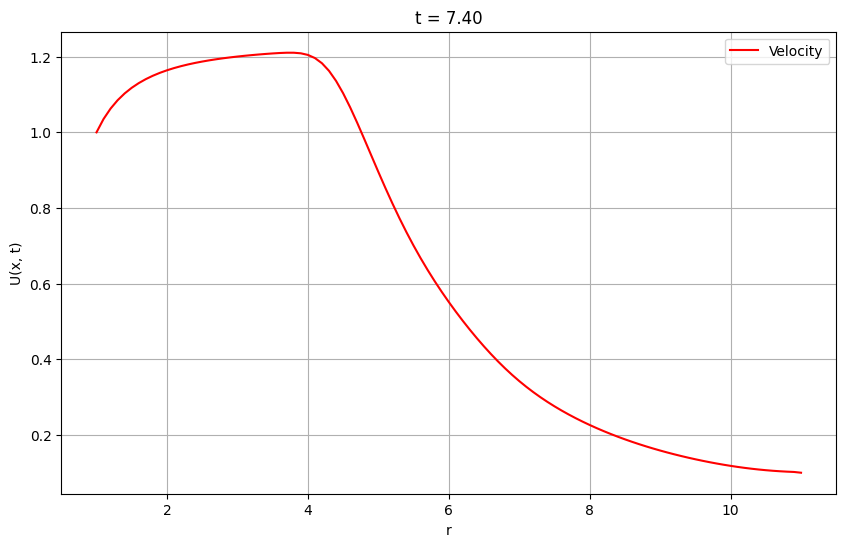

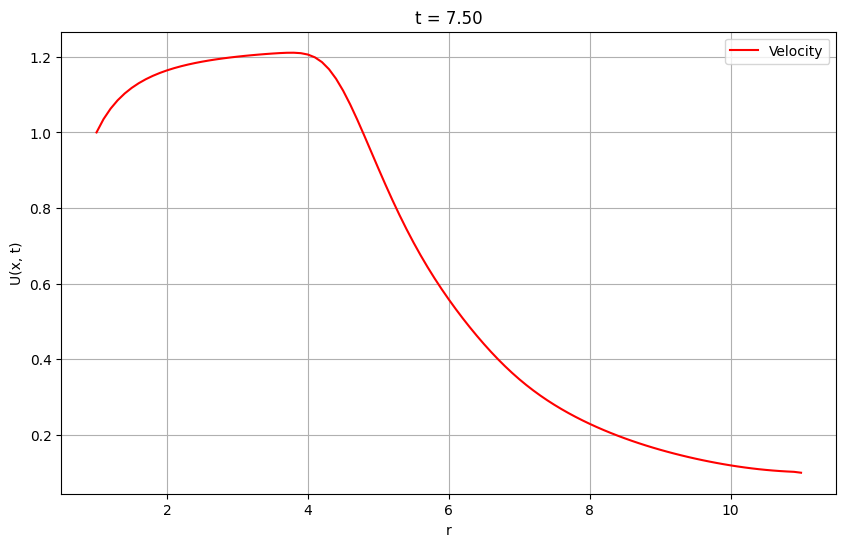

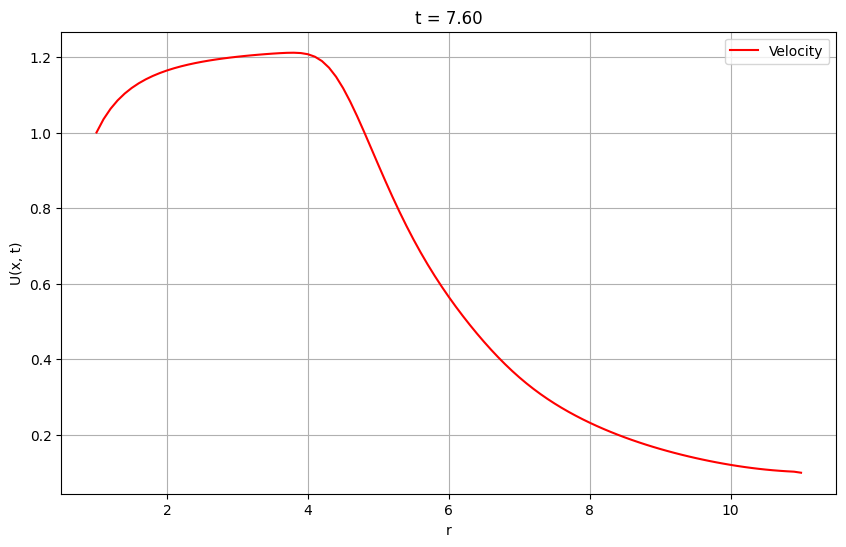

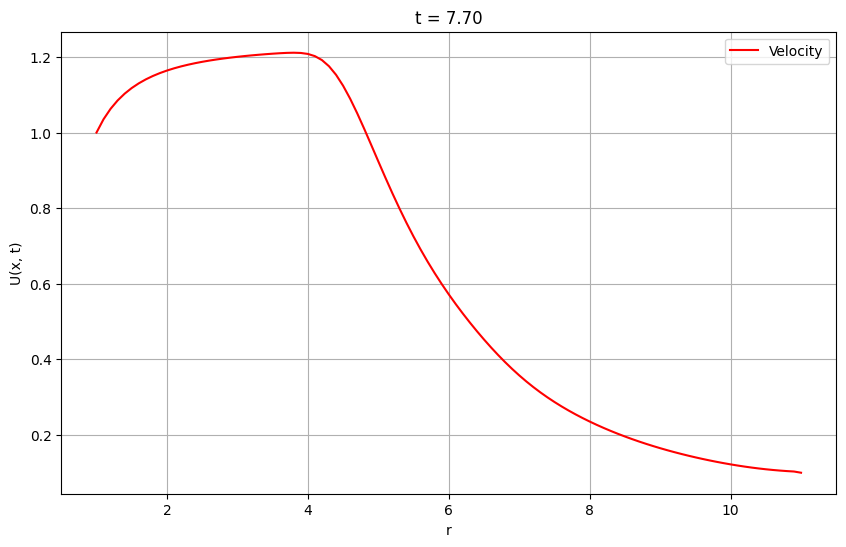

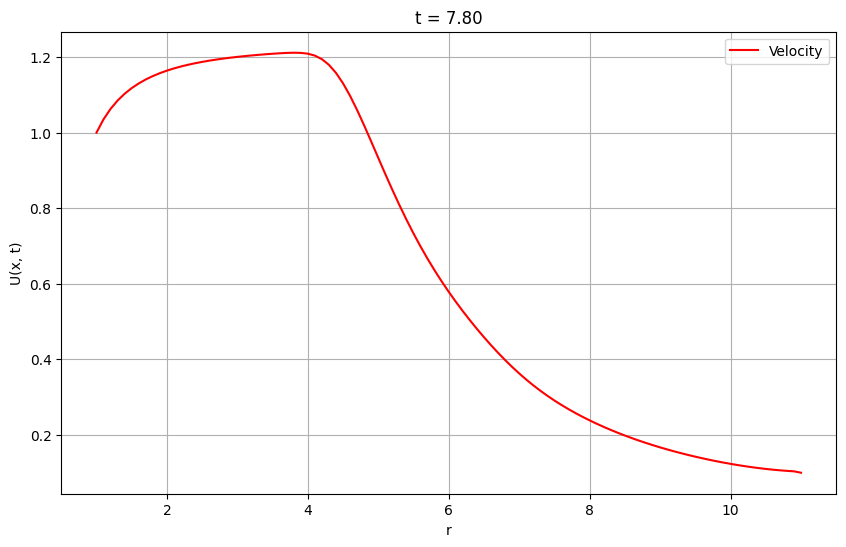

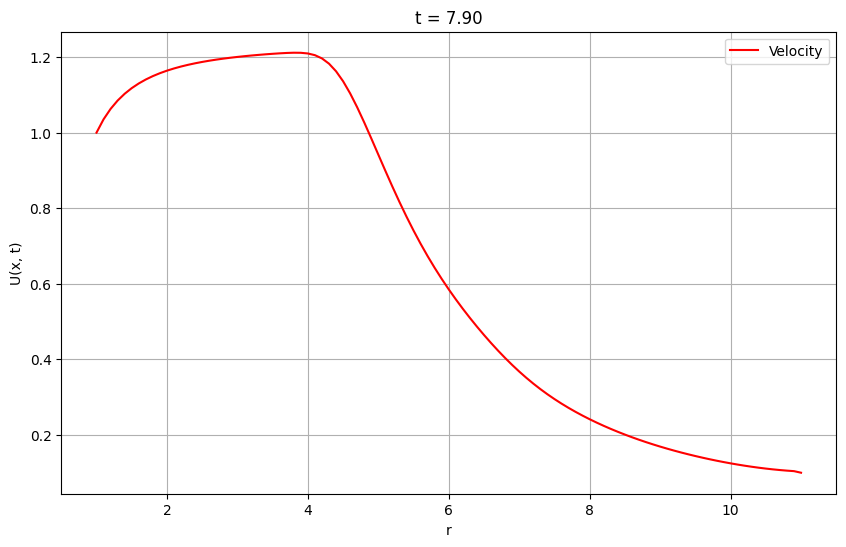

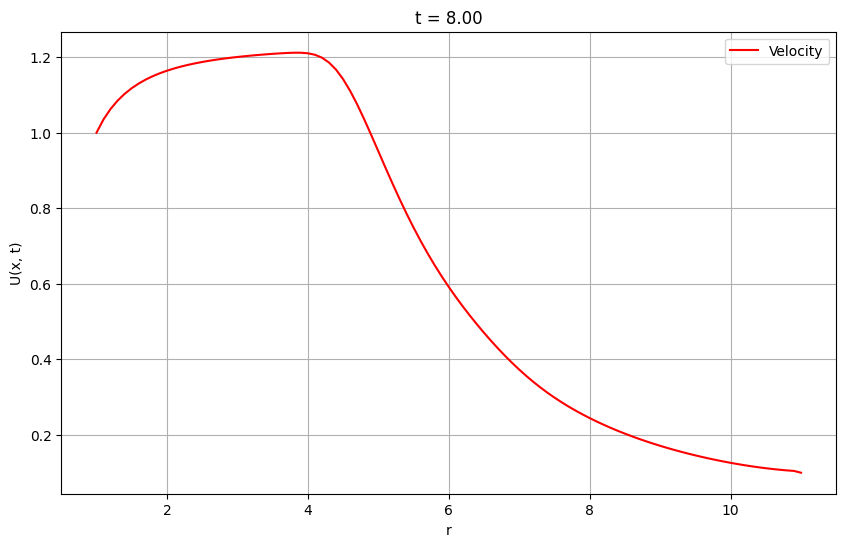

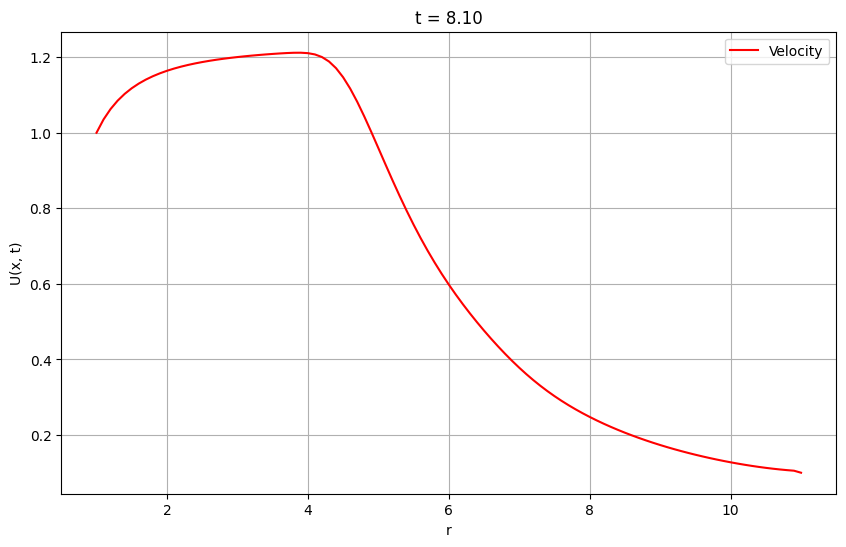

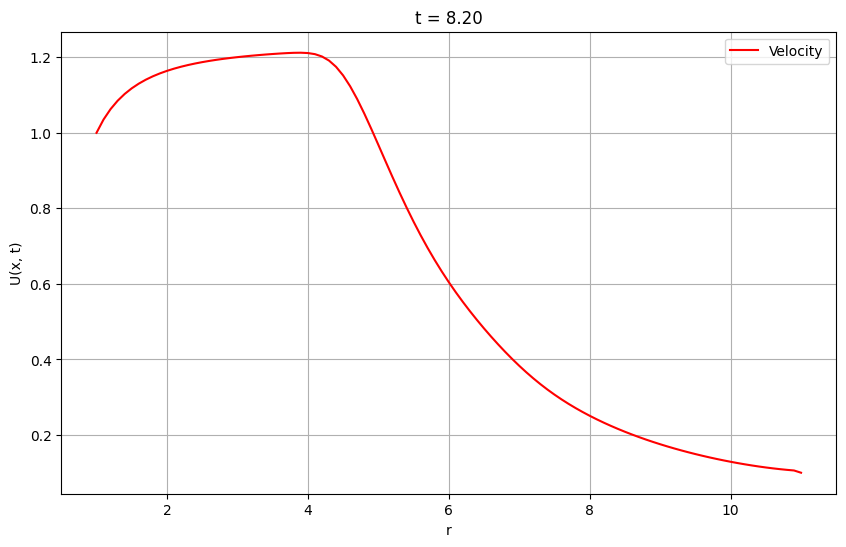

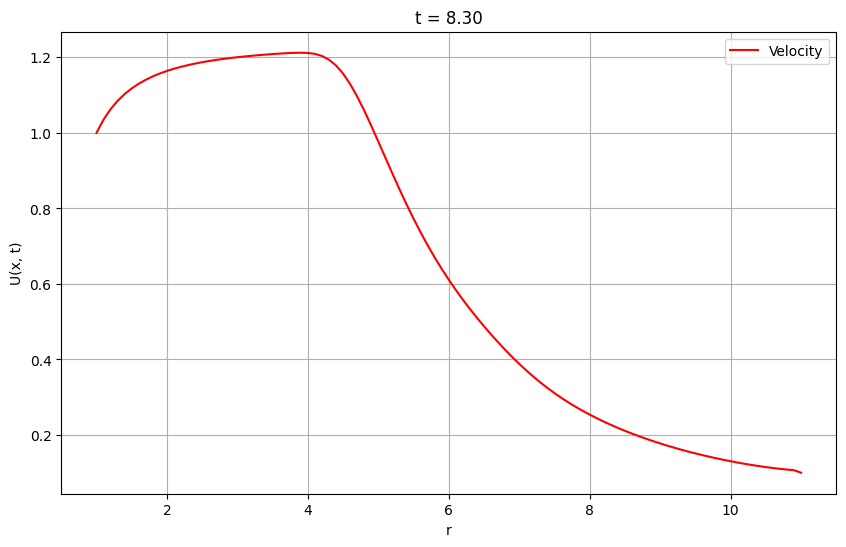

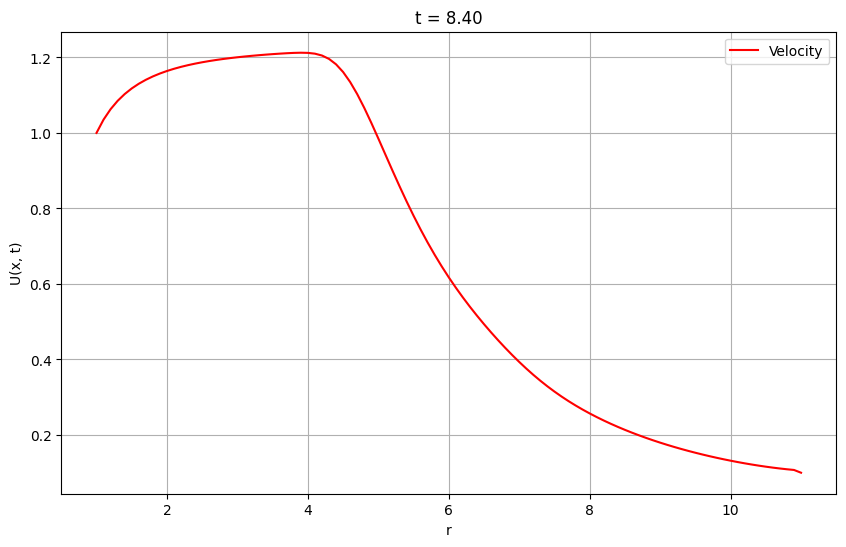

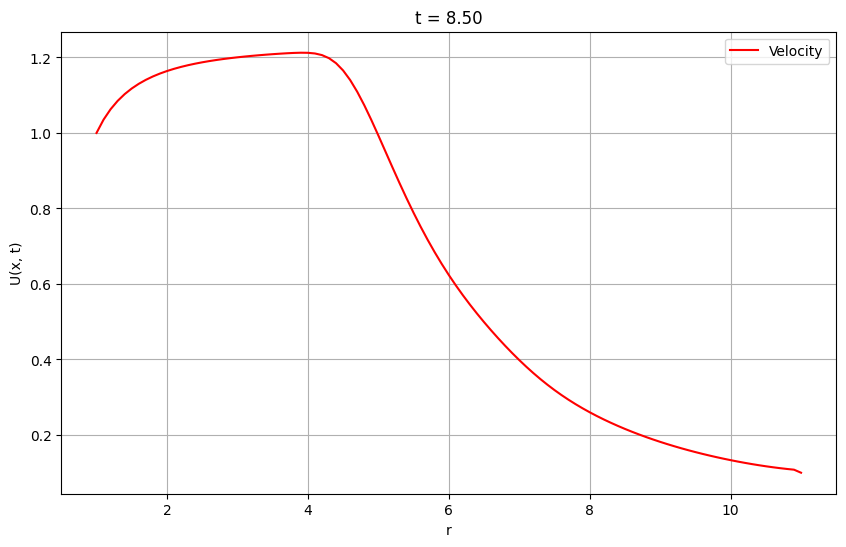

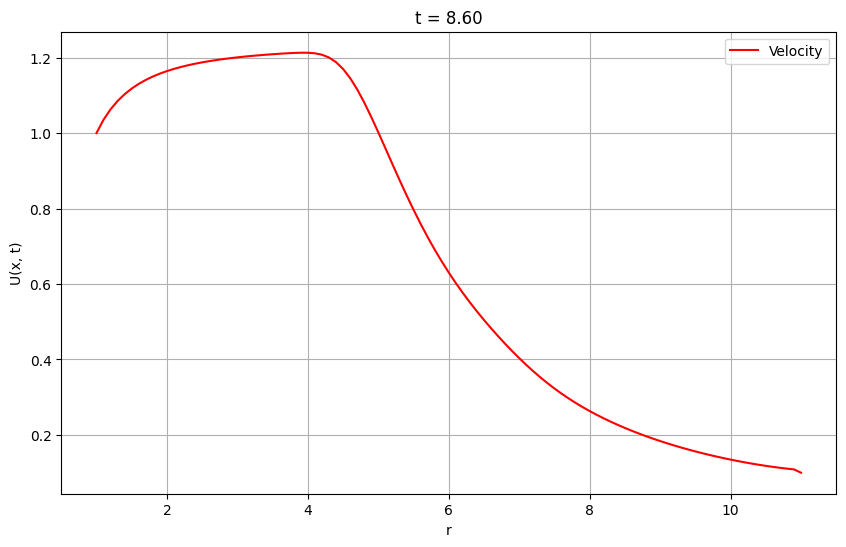

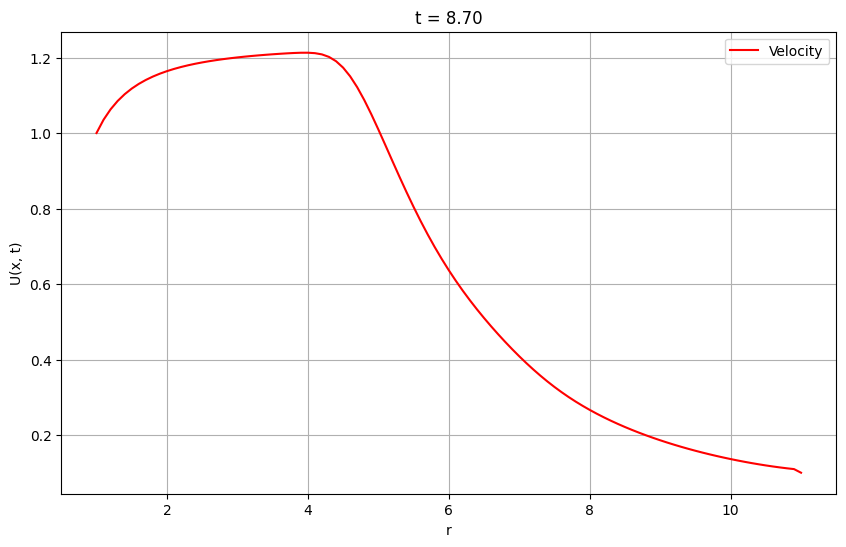

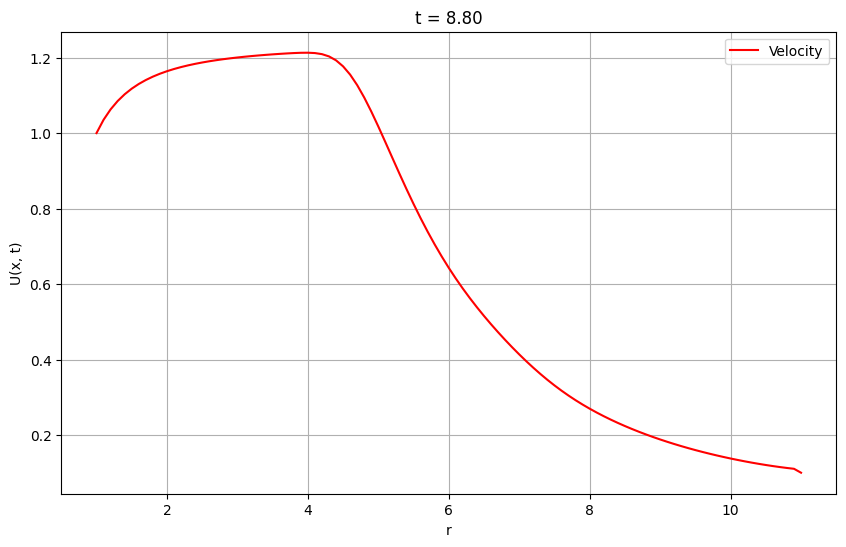

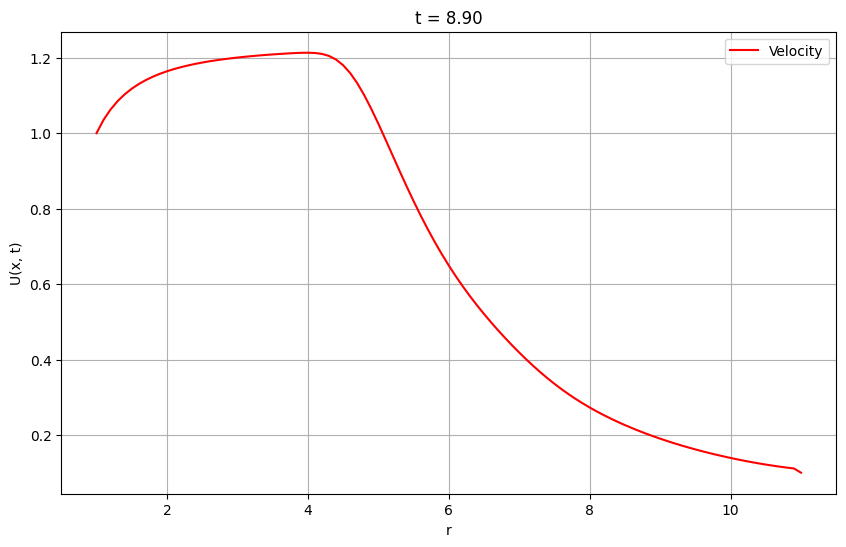

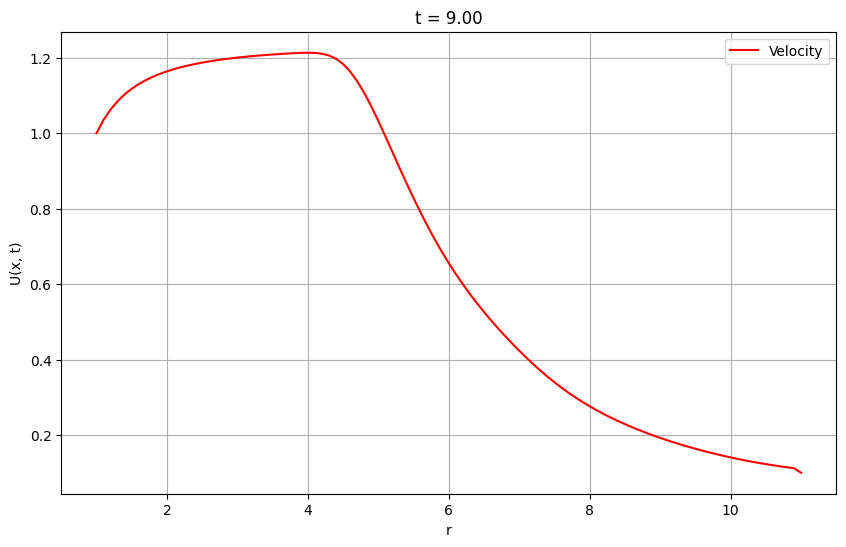

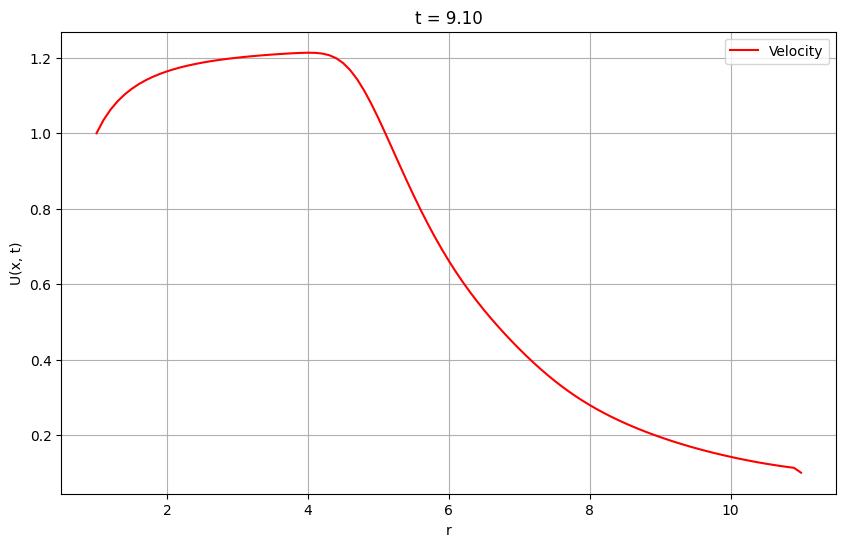

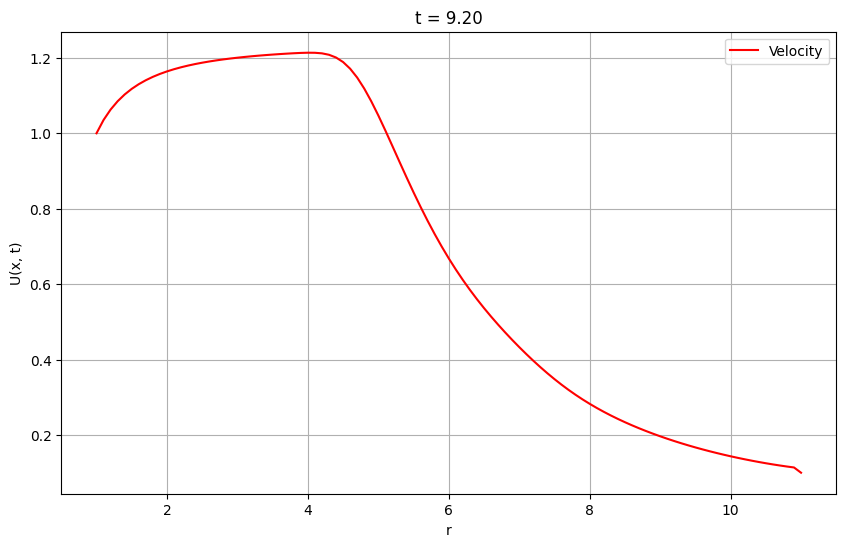

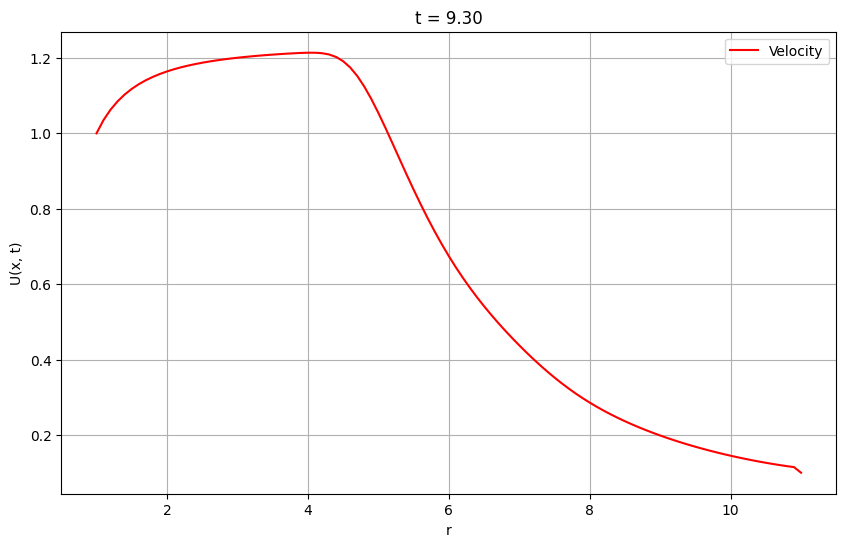

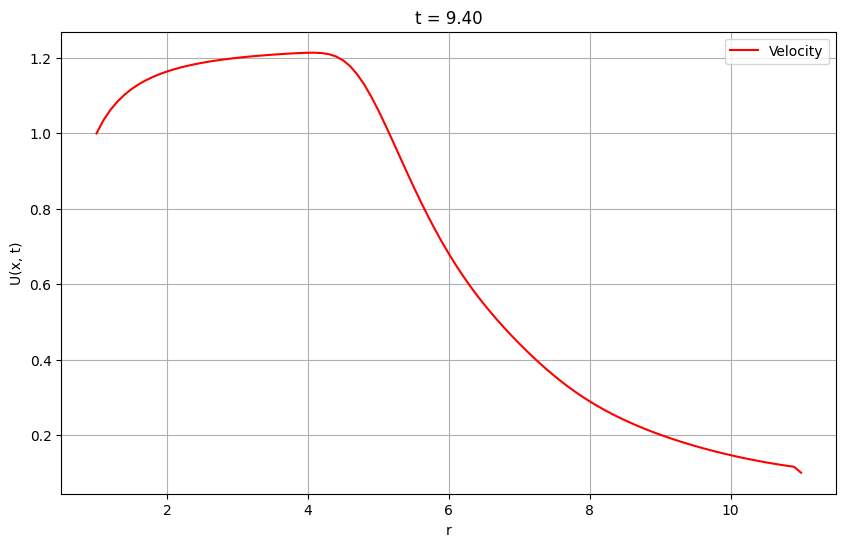

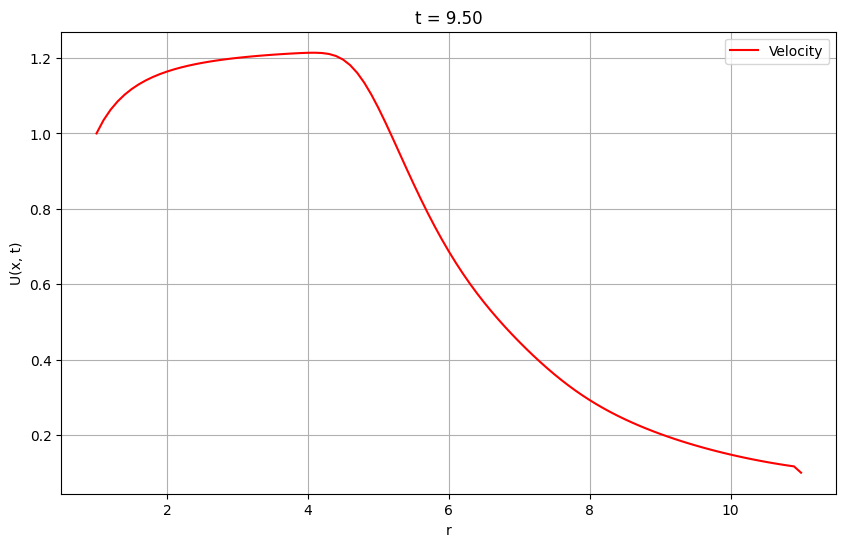

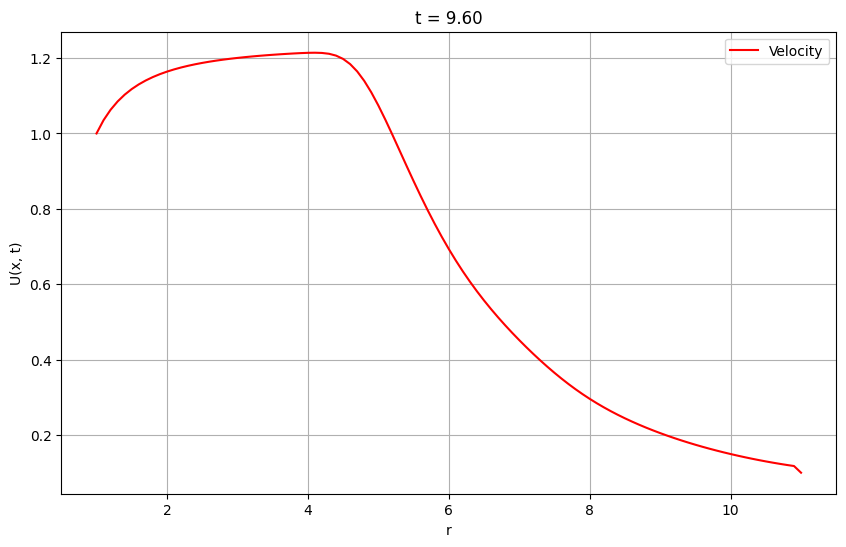

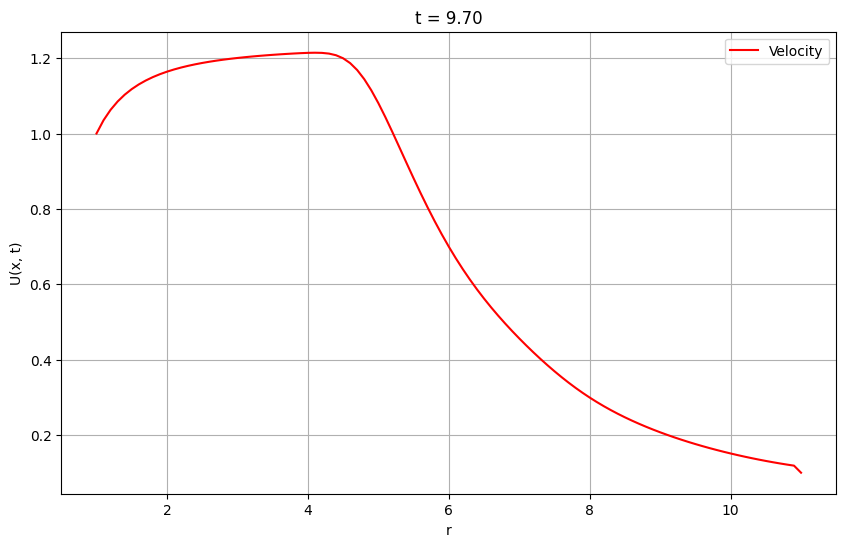

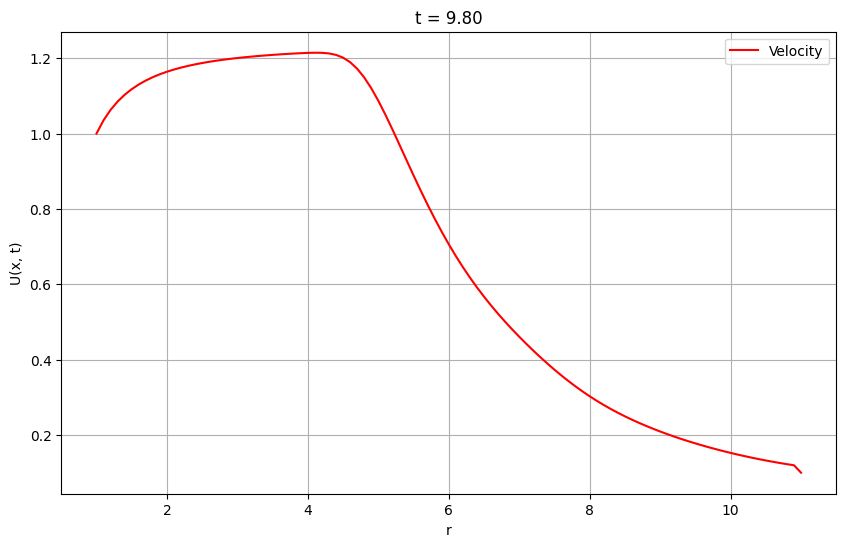

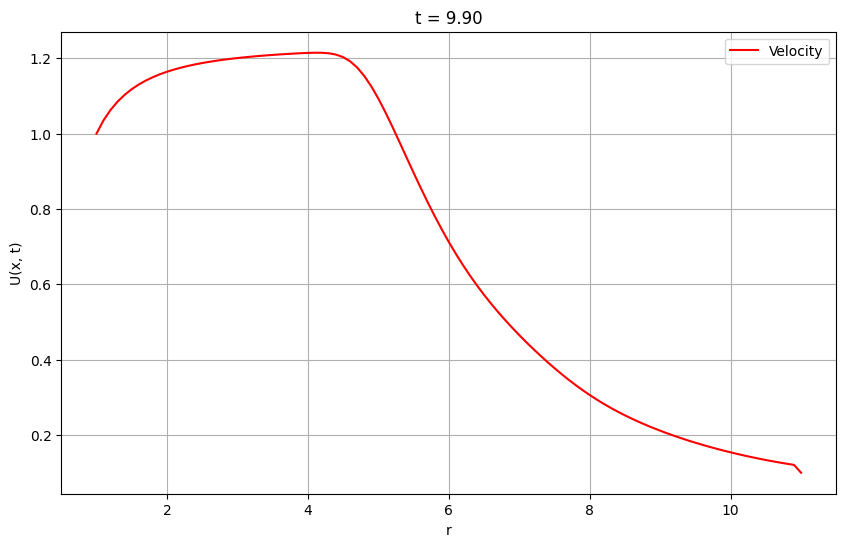

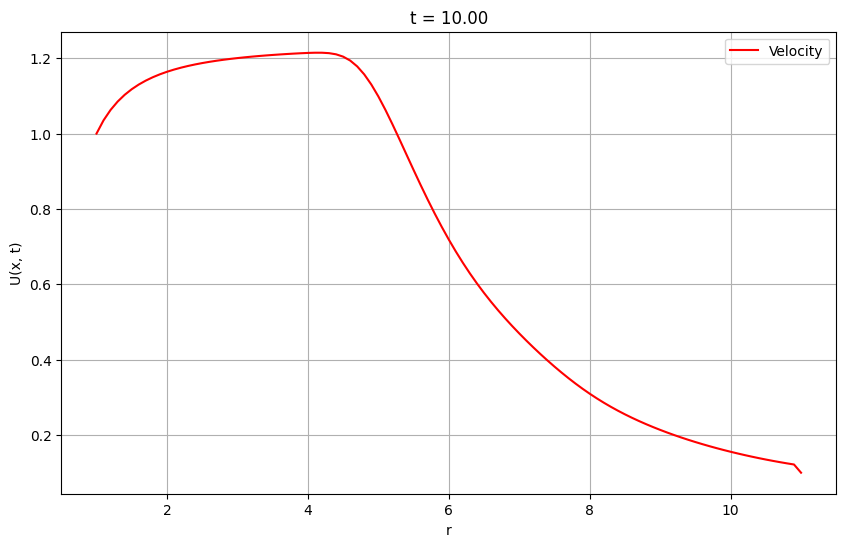

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 # Parameters

N = 101
dr = 0.1
dt = dr * 0.01
iterations = 10001
t = 0.
K = 1.
Μ = 5.
G = 1.
η = 0.1
r_min = 1.
r_max = 11

r = np.linspace(r_min, r_max, N)
U = np.zeros(N)
P = np.ones(N) * 0.1
ρ = np.ones(N) * 0.1

 # Initiate velocity
 
ρ[0]=1.
P[0]=1.
U[0] = 1.


 
#%%

 # Calculate velocity in Line

for j in range(iterations):
    
    U_n = np.copy(U)
    P_n = np.copy(P)
    ρ_n = np.copy(ρ)
    
    for i in range(1, N - 1):
        
        # Calculate derivatives
        
        drrU = (U_n[i + 1] - 2 * U_n[i] + U_n[i - 1]) / (dr**2)
        
        drU = (U_n[i ] - U_n[i - 1]) /  (dr)
        
        drρ = (ρ_n[i] - ρ_n[i - 1]) /  (dr)
            
        # Calculate ρ,e,U,P 
        
        ρ[i] = ρ_n[i] + dt * (-U_n[i] * drU - K/ρ[i] * drρ * (Μ * G) / r[i]**2)
        
        U[i] = U_n[i] + dt * (-2/r[i] *ρ_n[i] * U_n[i] - drρ * U_n[i] - ρ_n[i] * drU + η * (2/r[i]*drU+drrU))
        
        
        P[i] = K * ρ[i]
        
    
    t = t + dt
#%%

# Plot animation 
    
    if j % 100 == 0:  # Frames
        plt.figure(figsize=(10, 6))  
        plt.plot(r, ρ, 'r', label='Velocity')  
        plt.xlabel('r')
        plt.ylabel('U(x, t)')
        plt.title(f't = {j * dt:.2f}')
        plt.grid(True) 
        plt.legend()